In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
%matplotlib inline

In [2]:
df = pd.read_csv("../data/train.csv")

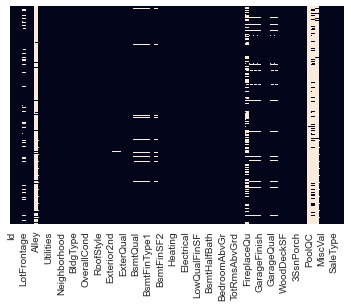

In [3]:
sns.heatmap(df.isnull(),cbar=None,yticklabels=False)

In [4]:
df.shape

(1460, 81)

# Data Visualization

In [5]:
cat_feat_1 = np.array([feature for feature in df.columns if df[feature].nunique()<=25])
copy = df.copy().drop(["SalePrice","Id"],1)
cont_feat = np.array([feature for feature in copy.columns if copy[feature].nunique()>25])
del copy

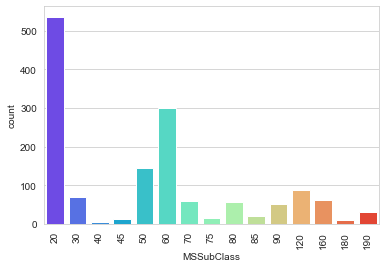

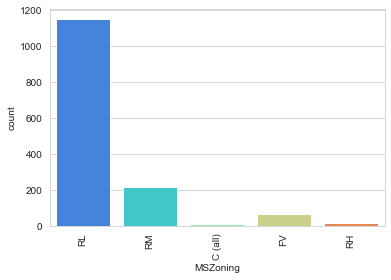

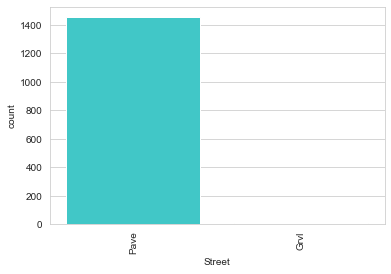

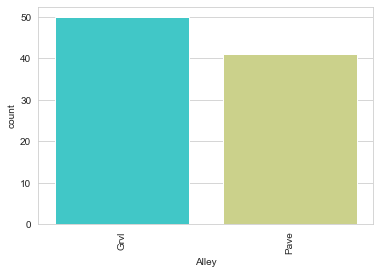

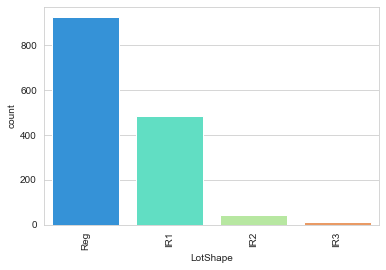

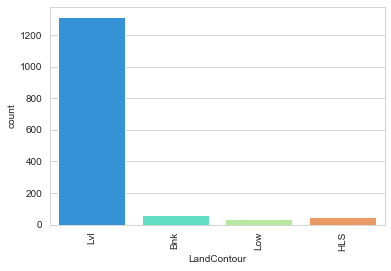

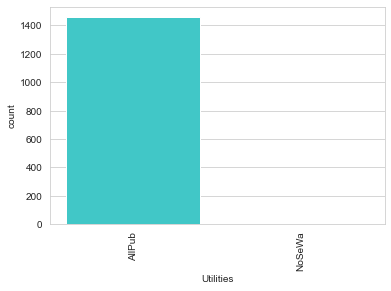

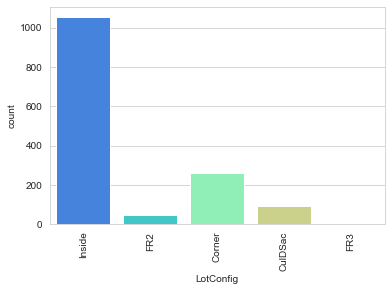

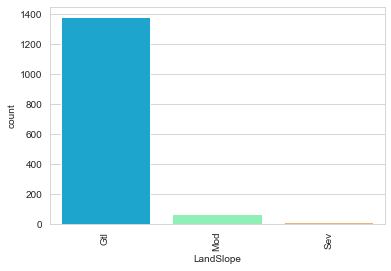

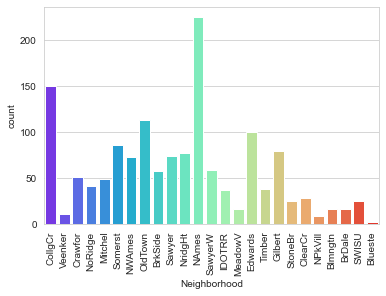

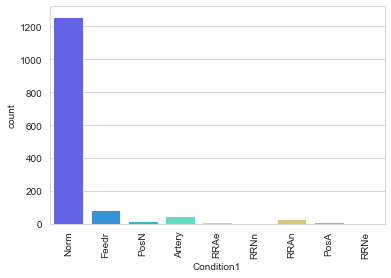

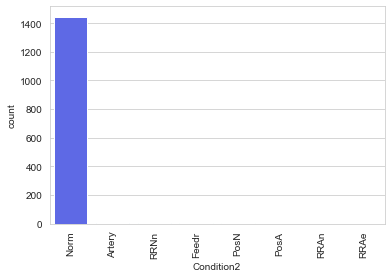

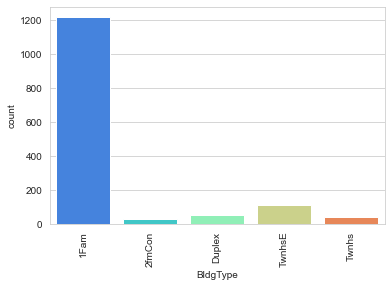

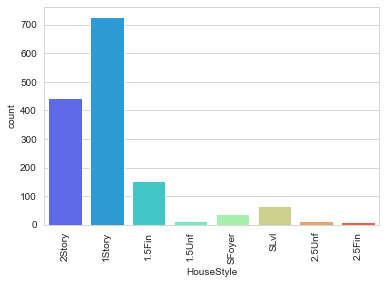

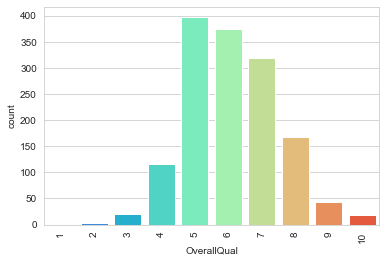

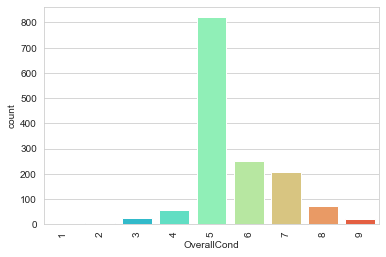

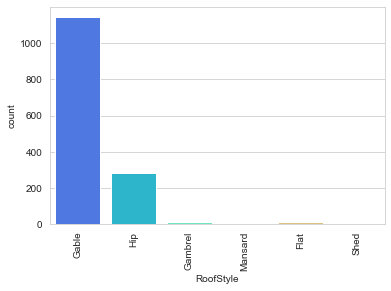

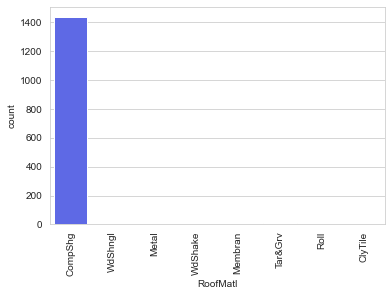

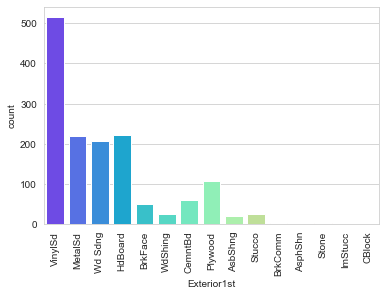

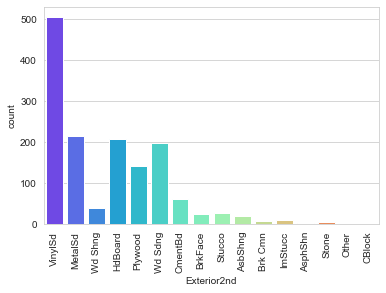

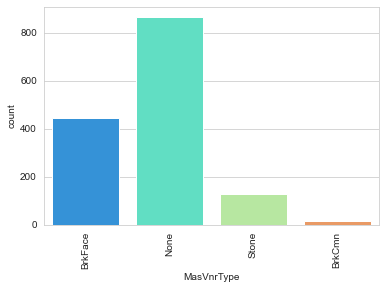

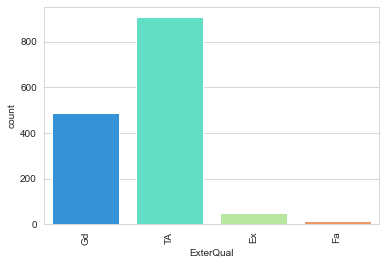

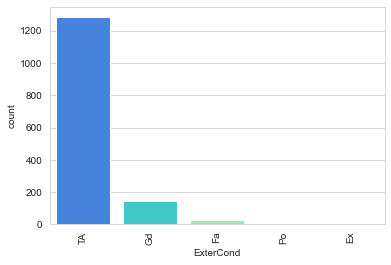

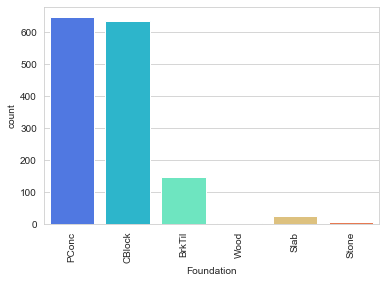

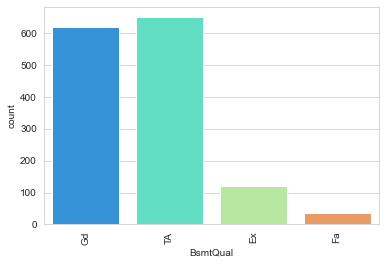

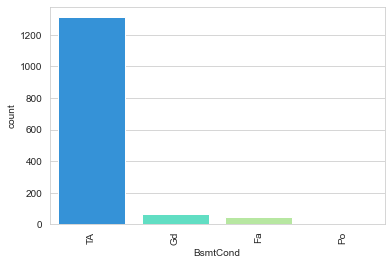

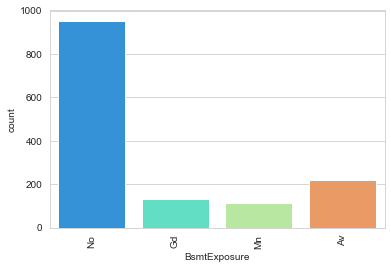

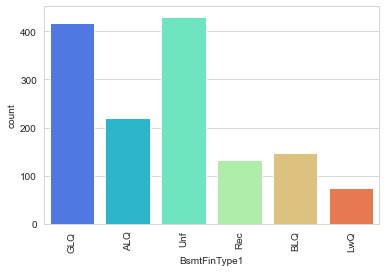

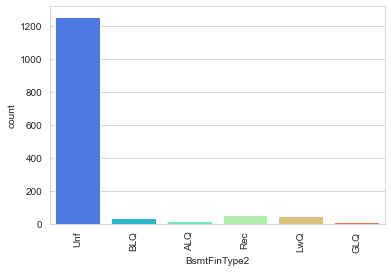

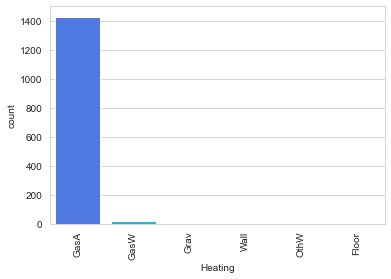

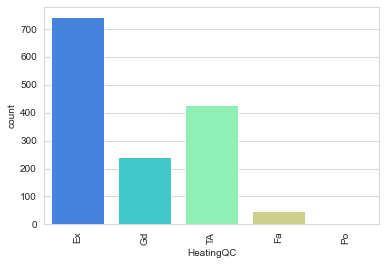

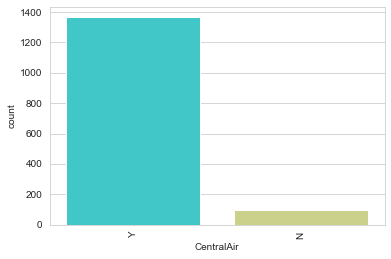

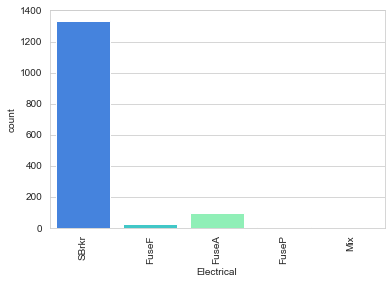

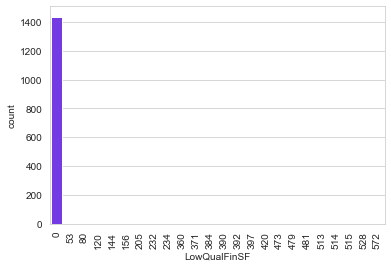

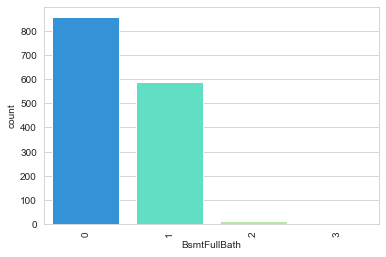

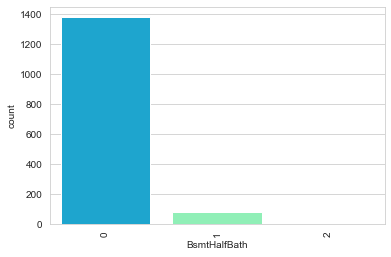

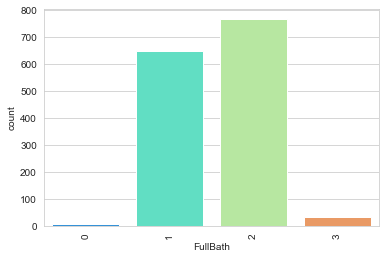

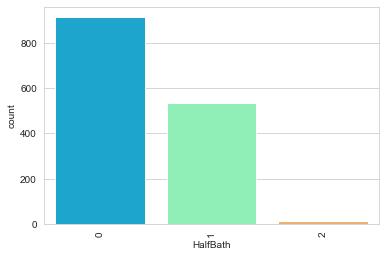

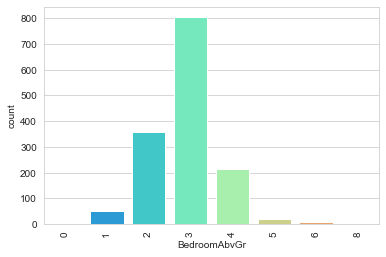

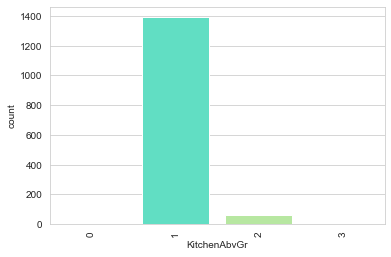

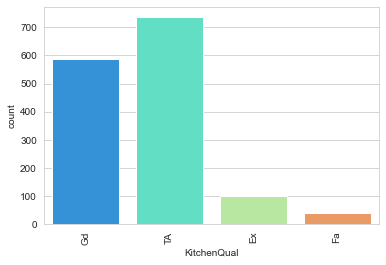

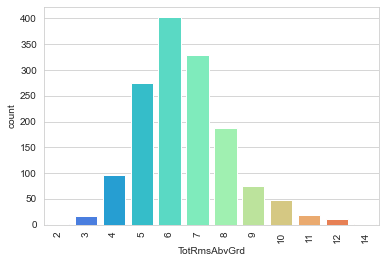

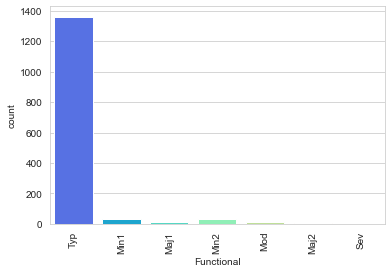

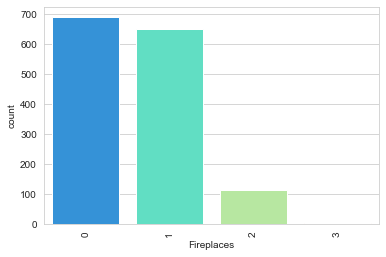

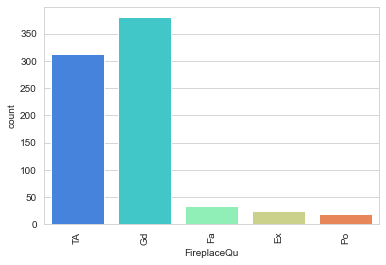

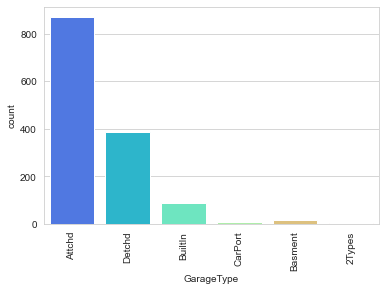

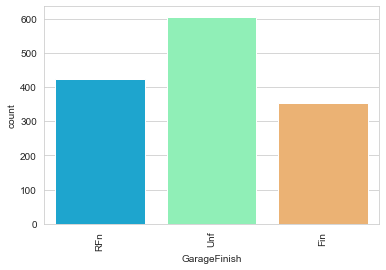

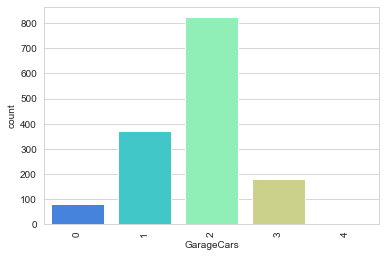

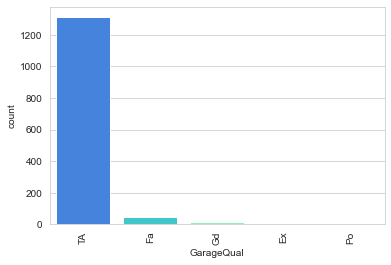

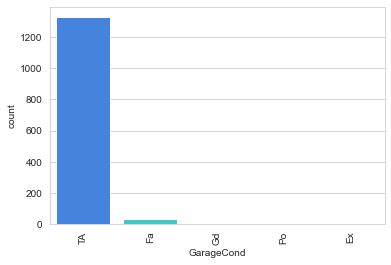

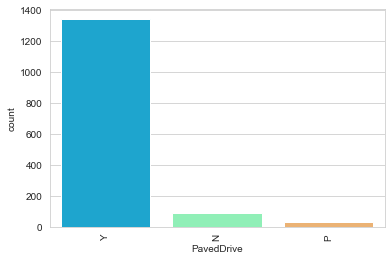

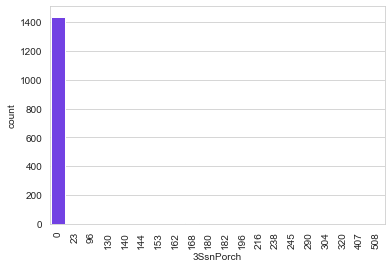

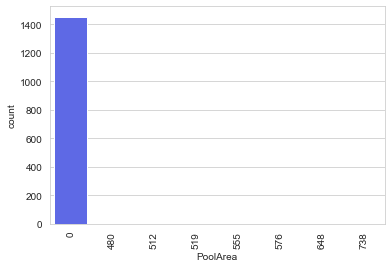

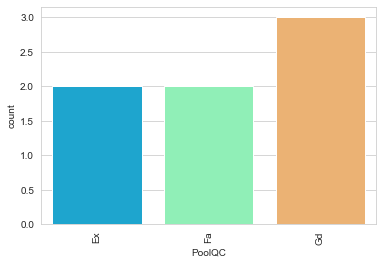

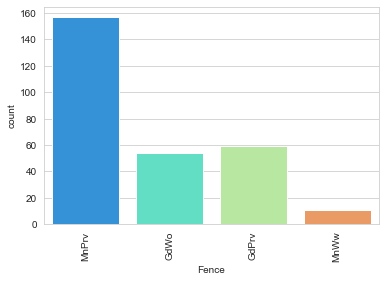

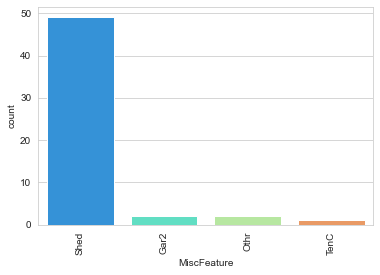

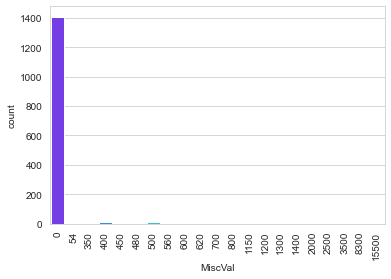

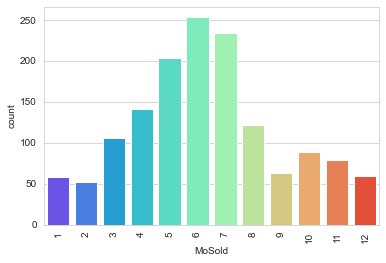

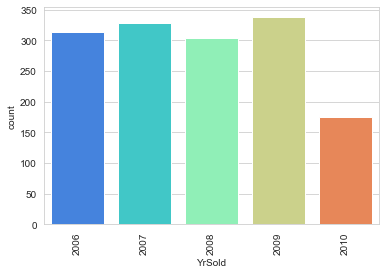

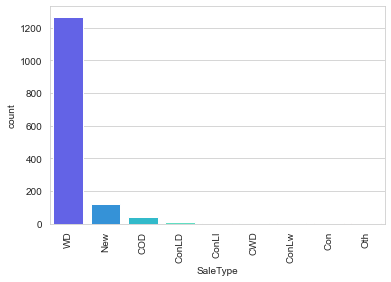

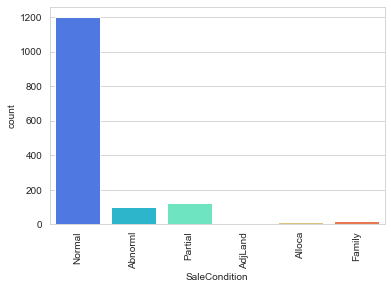

In [6]:
for feature in cat_feat_1:
    sns.countplot(df[feature],palette='rainbow')
    plt.xticks(rotation=90)
    plt.show()

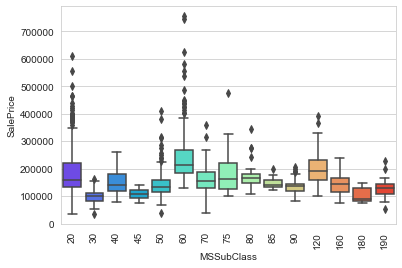

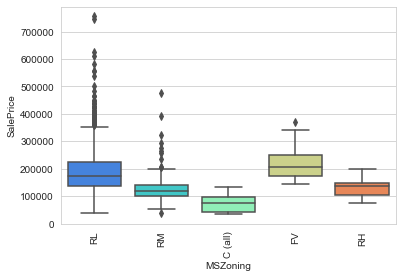

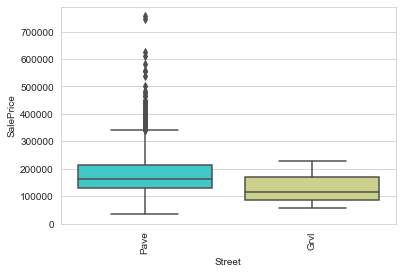

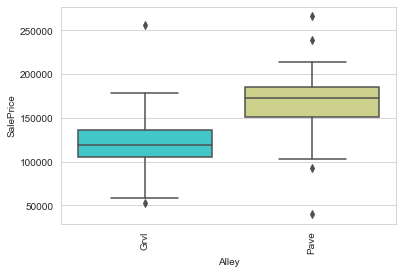

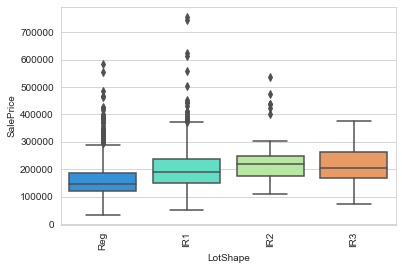

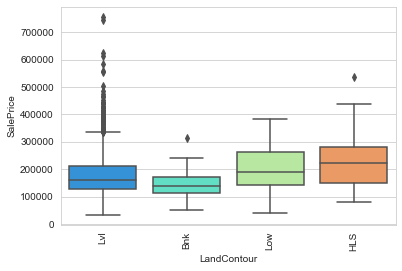

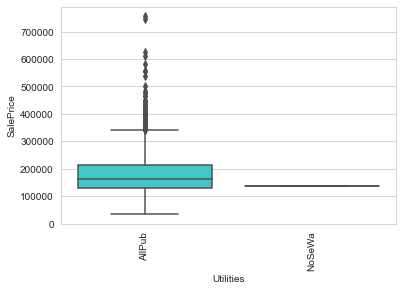

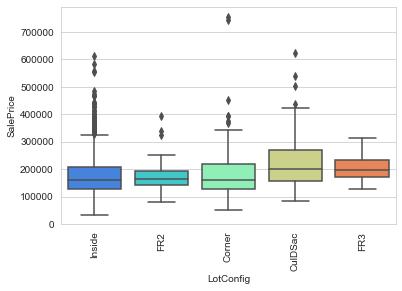

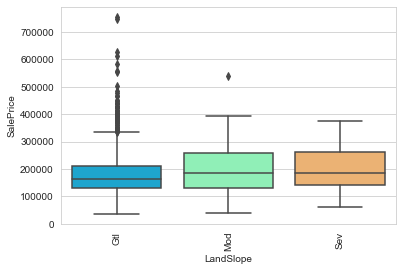

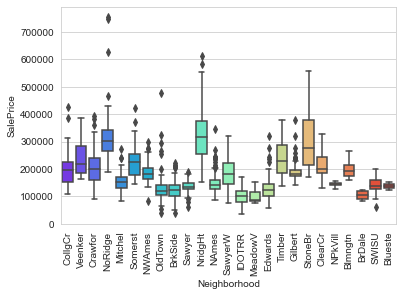

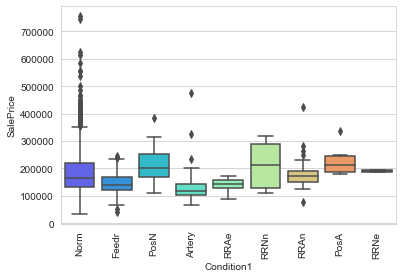

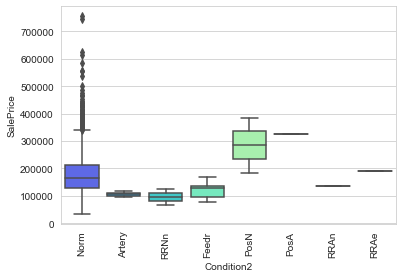

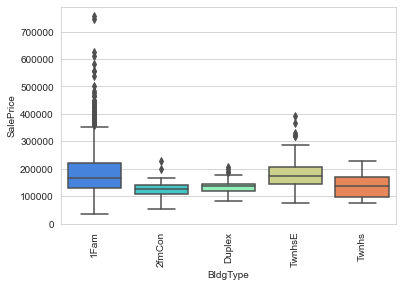

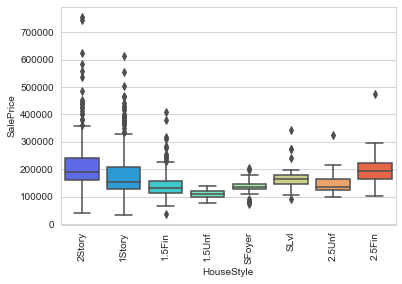

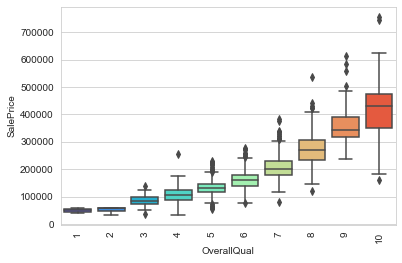

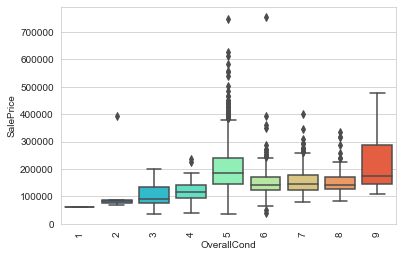

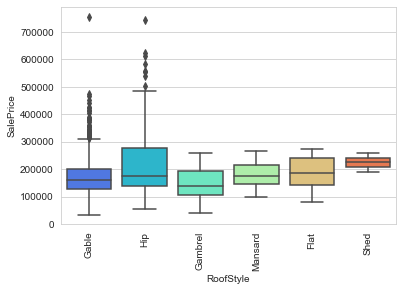

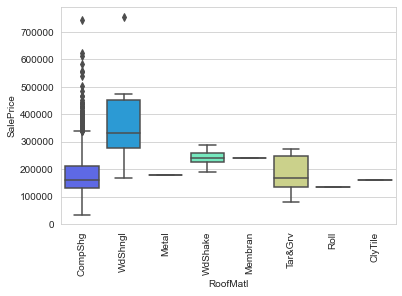

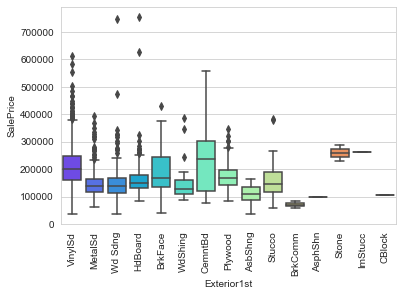

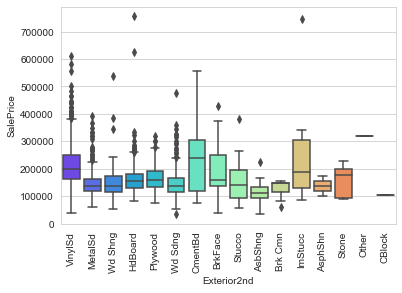

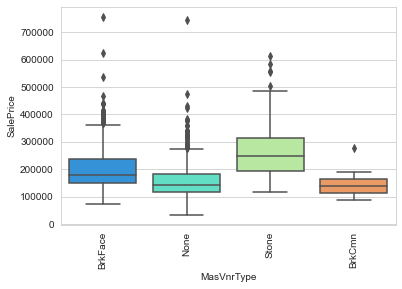

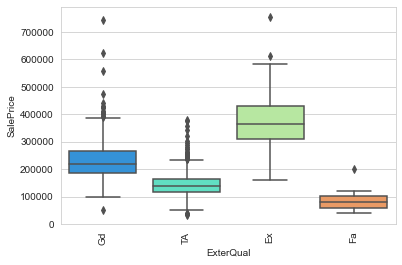

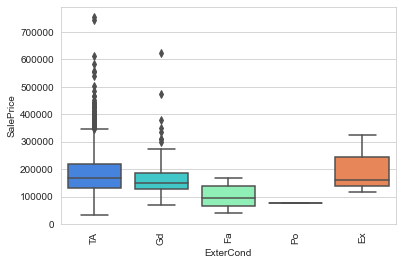

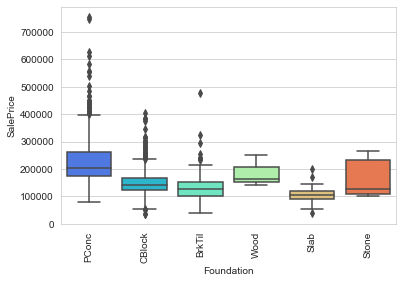

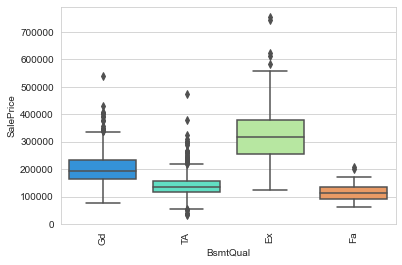

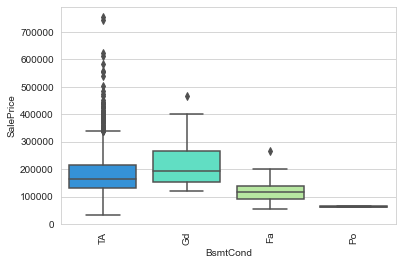

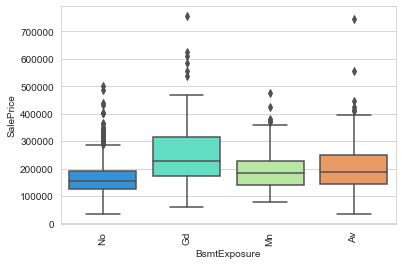

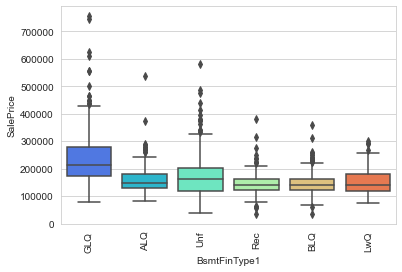

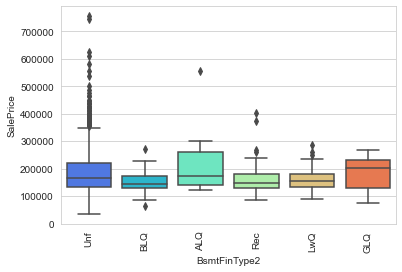

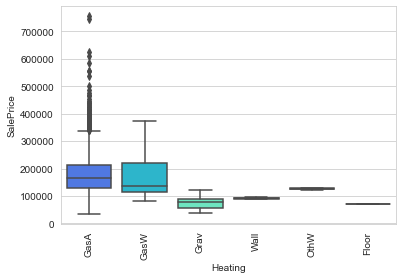

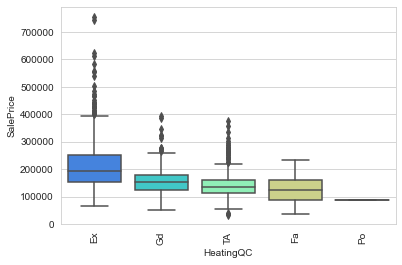

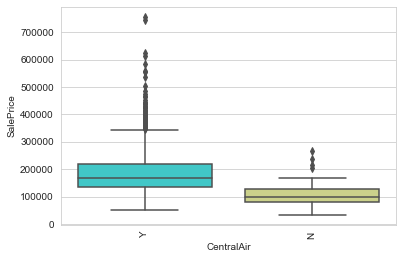

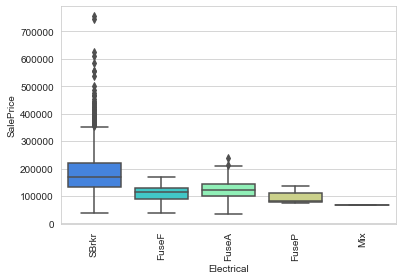

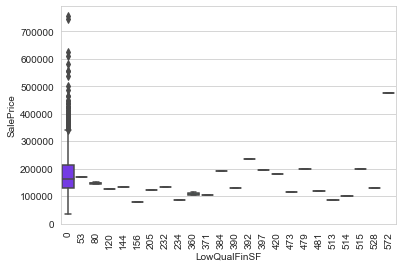

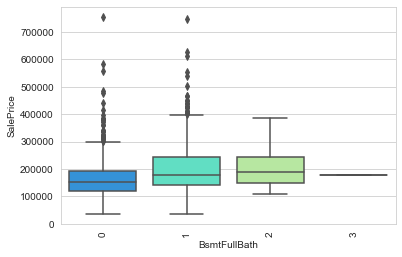

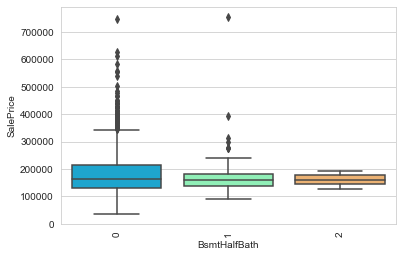

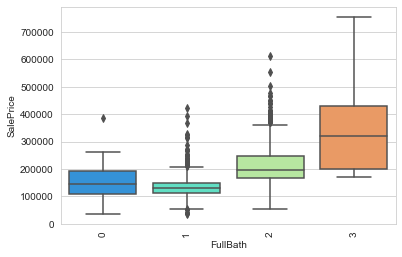

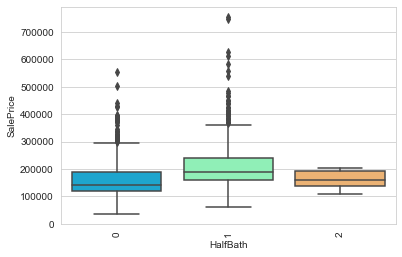

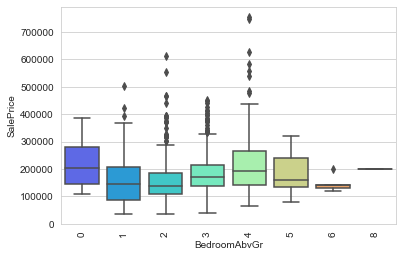

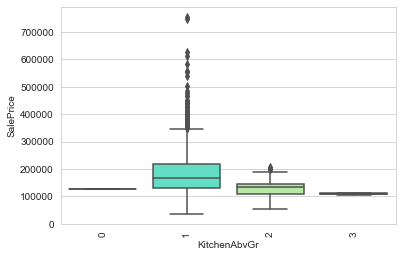

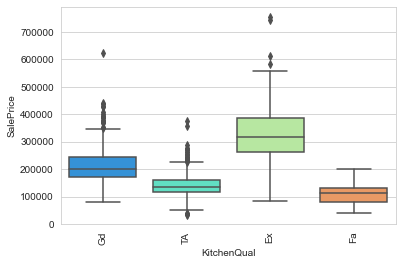

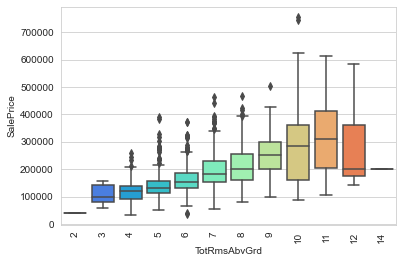

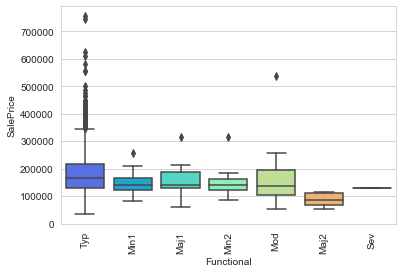

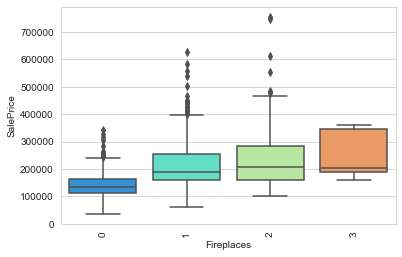

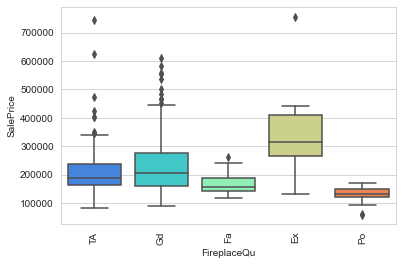

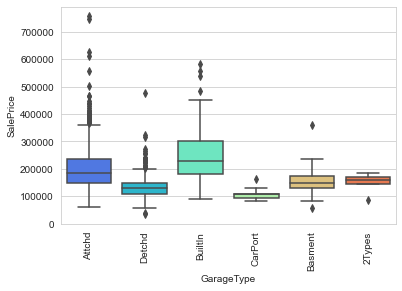

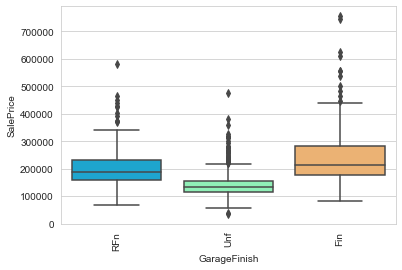

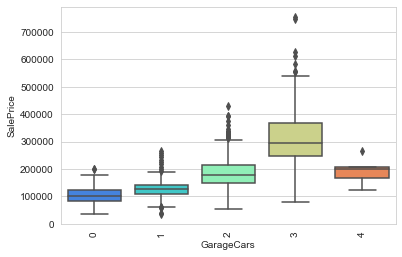

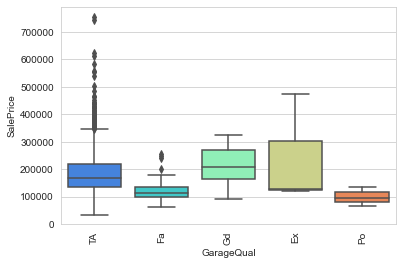

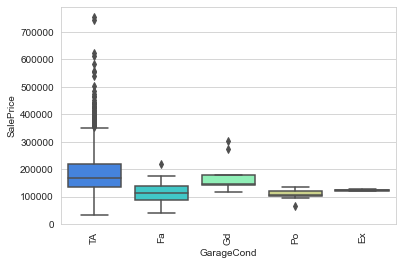

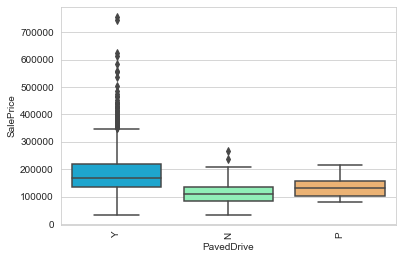

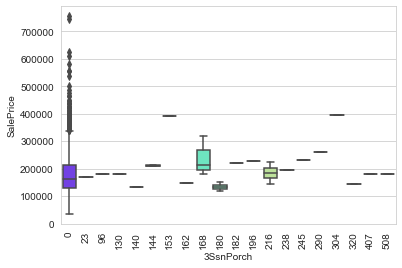

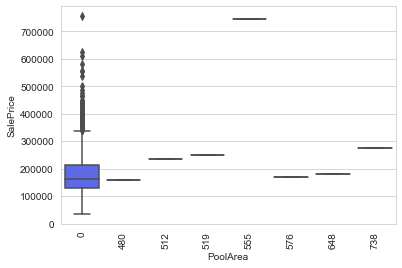

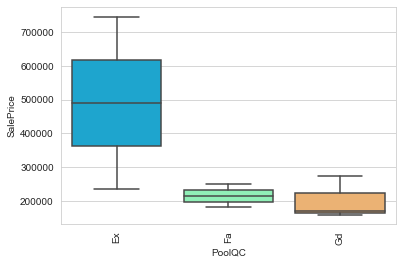

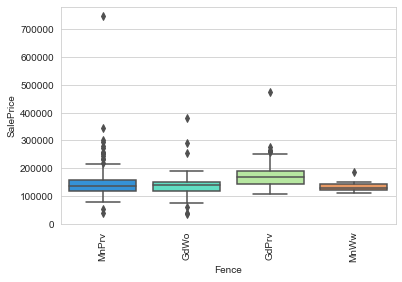

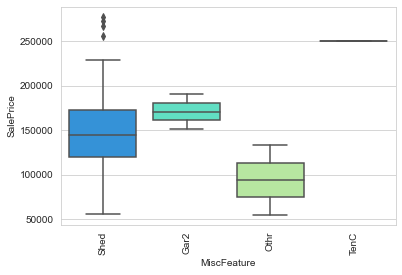

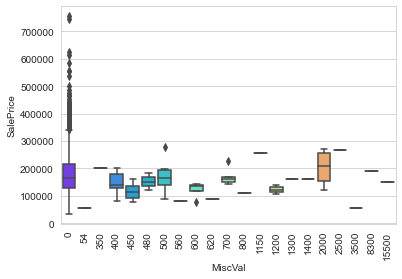

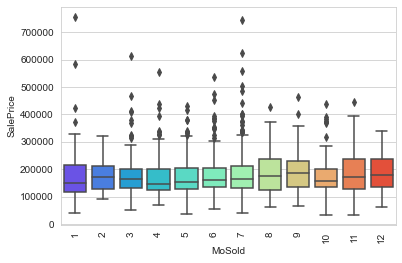

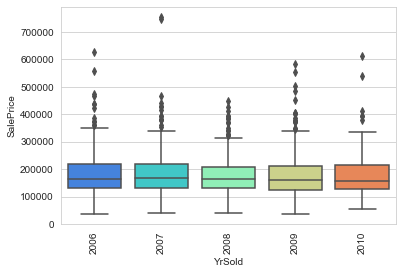

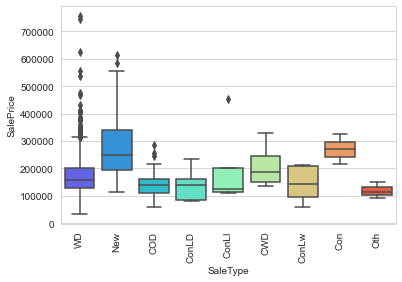

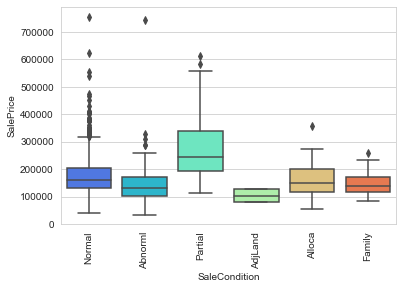

In [7]:
for feature in cat_feat_1:
    sns.boxplot(df[feature],df["SalePrice"],palette='rainbow')
    plt.xticks(rotation=90)
    plt.show()

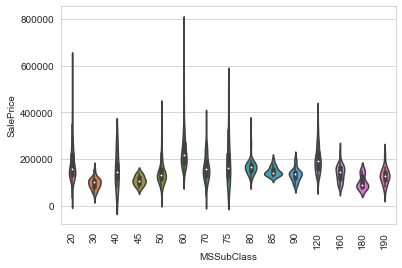

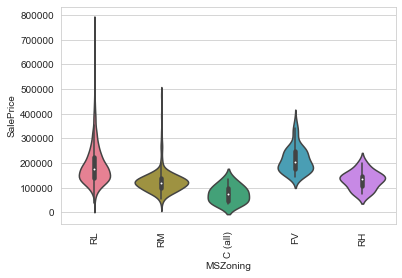

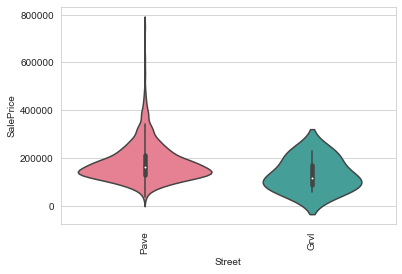

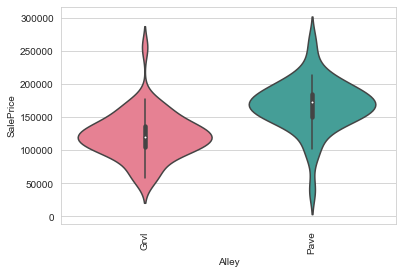

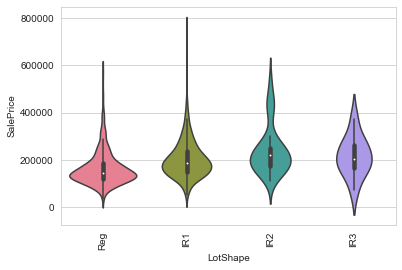

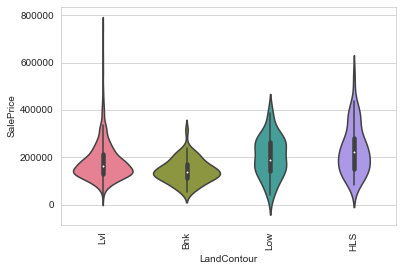

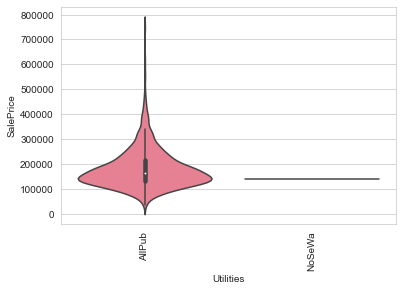

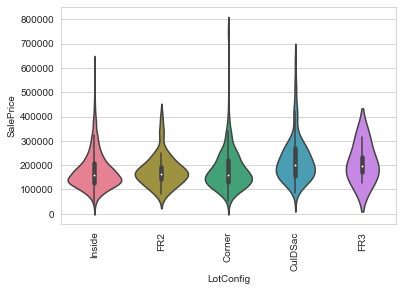

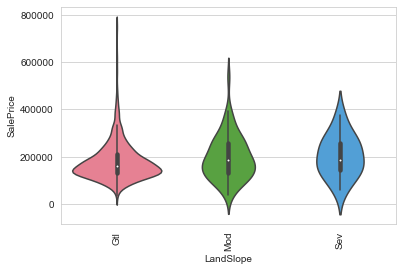

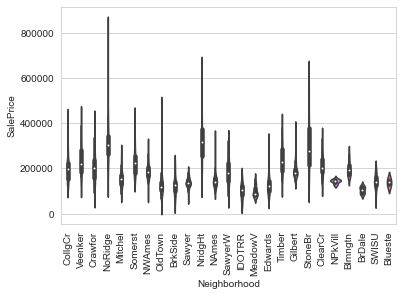

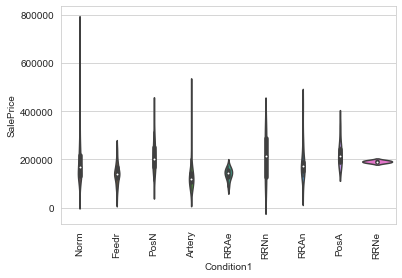

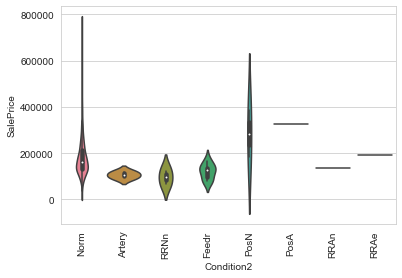

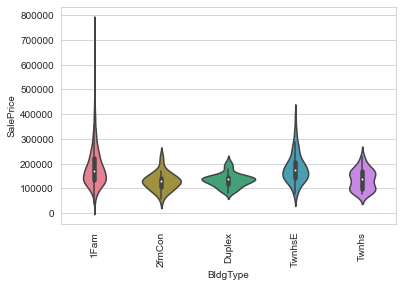

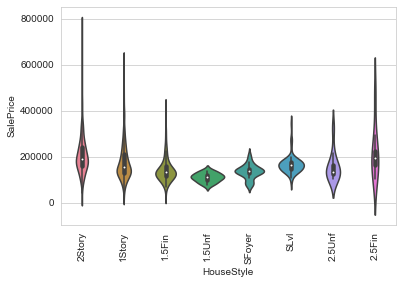

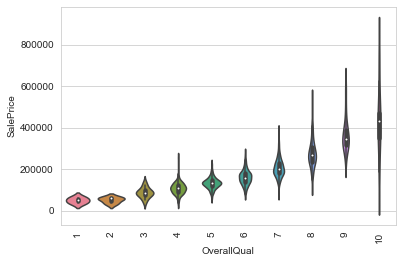

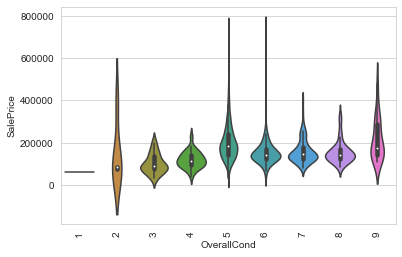

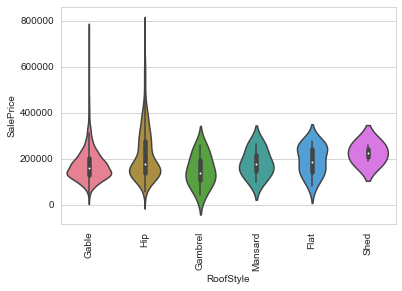

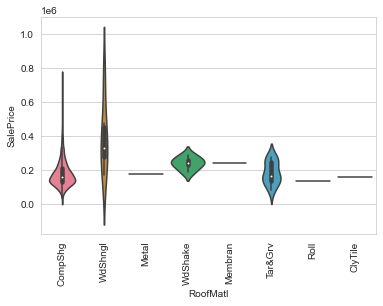

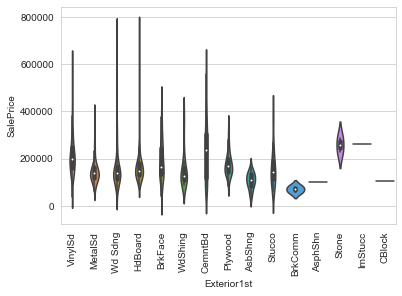

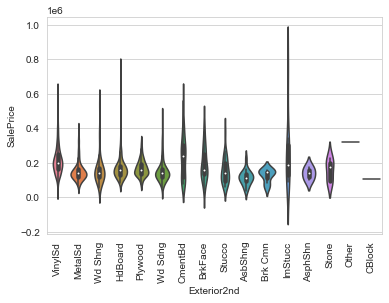

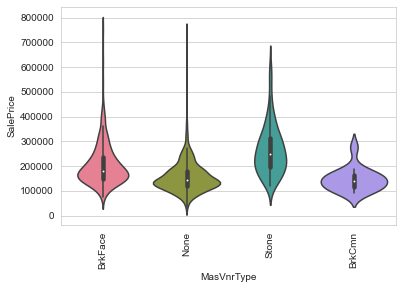

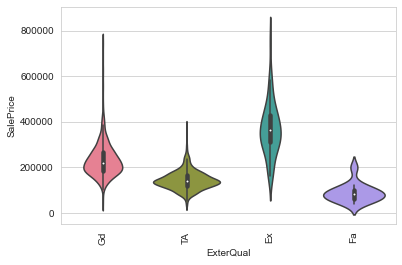

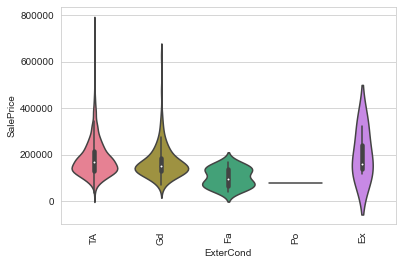

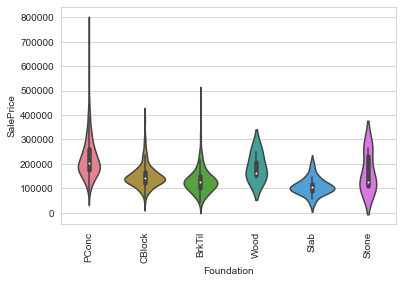

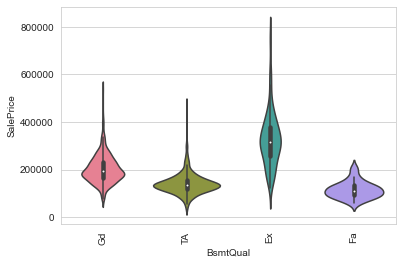

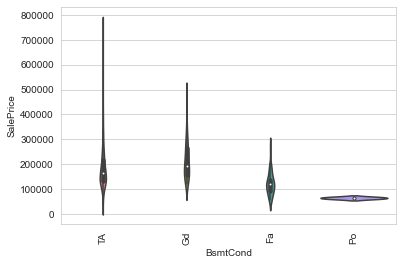

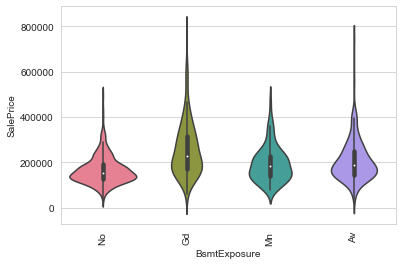

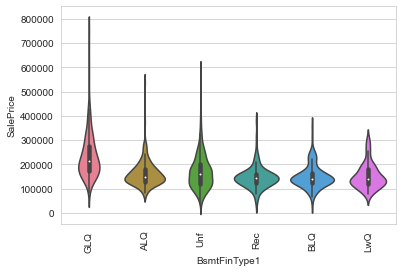

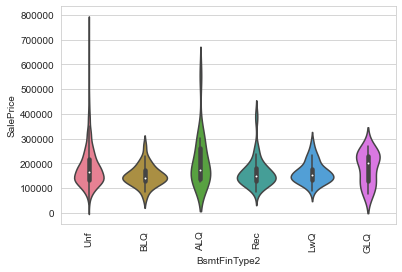

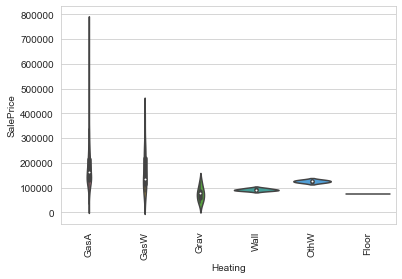

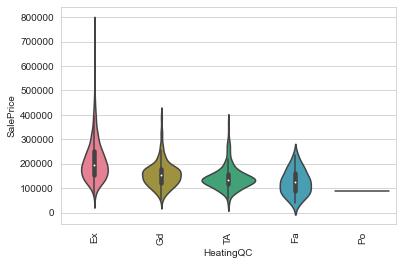

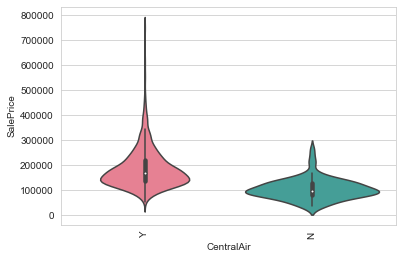

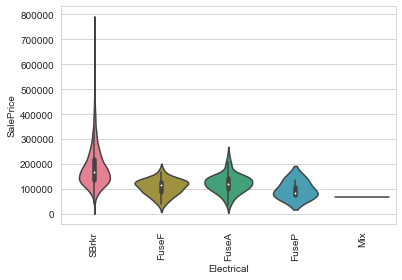

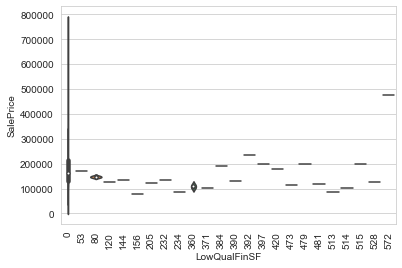

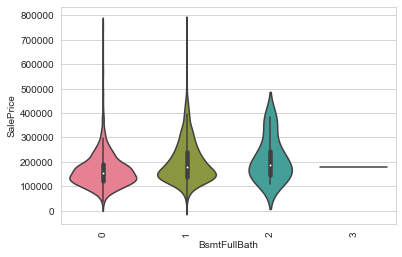

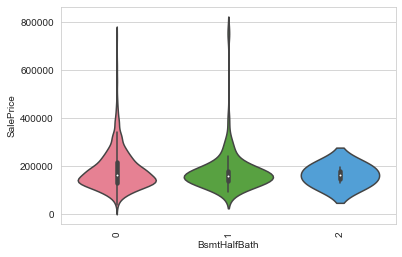

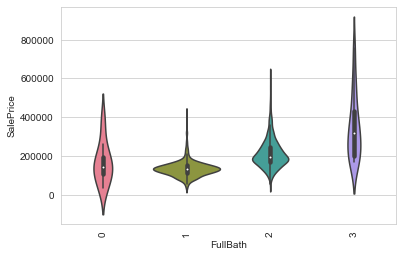

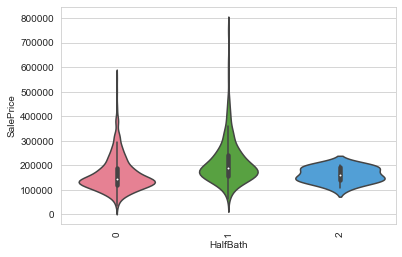

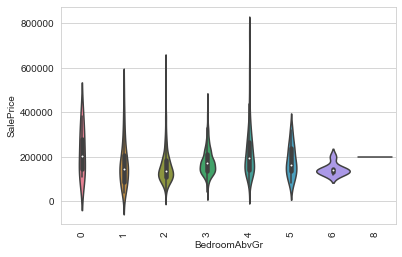

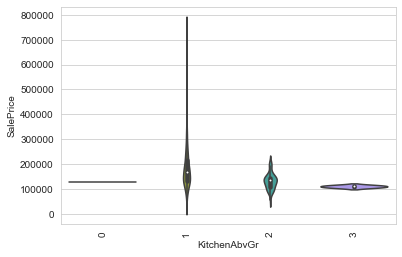

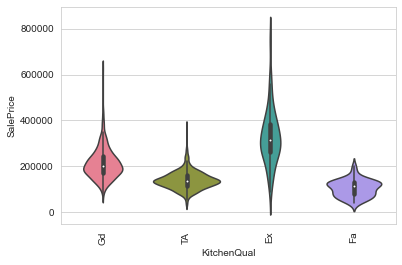

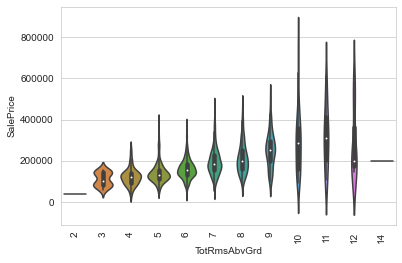

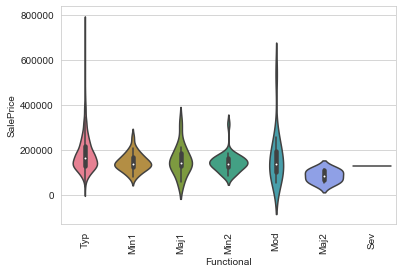

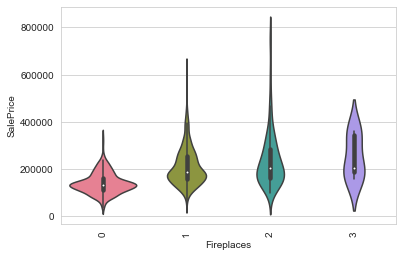

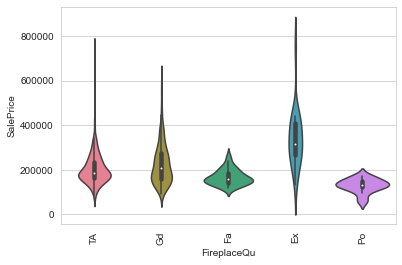

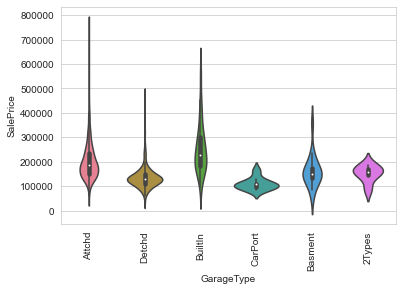

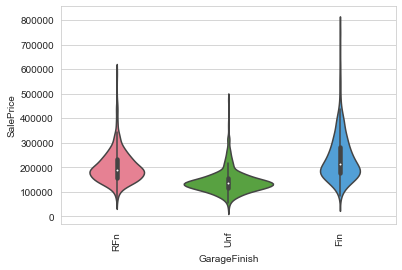

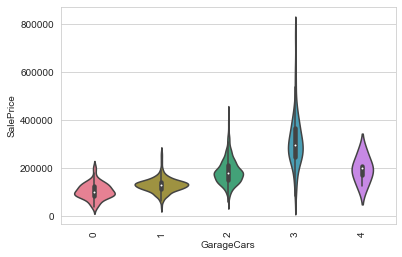

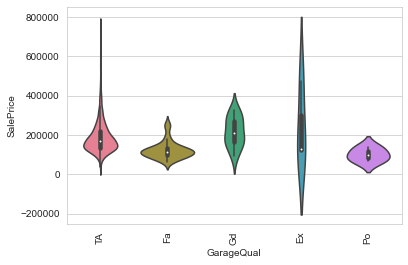

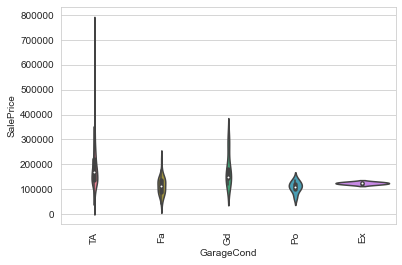

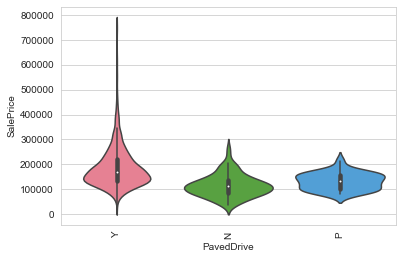

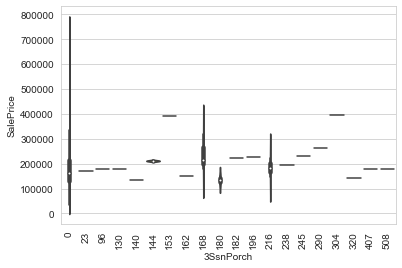

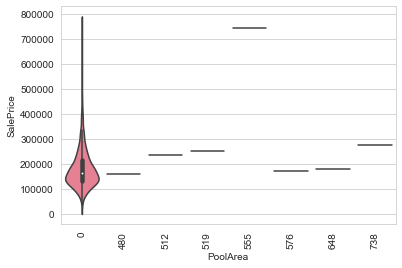

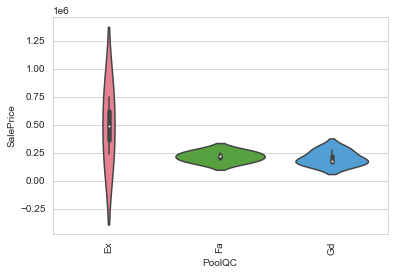

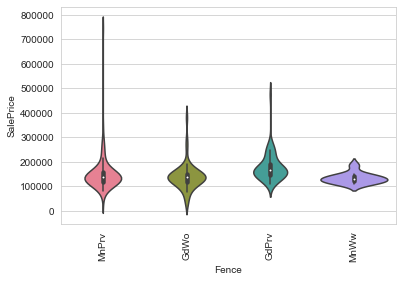

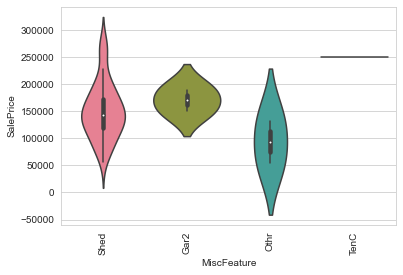

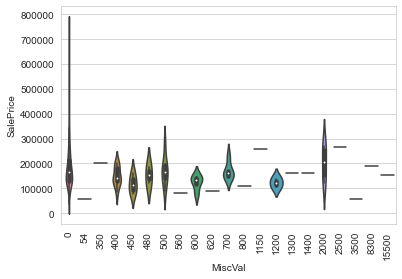

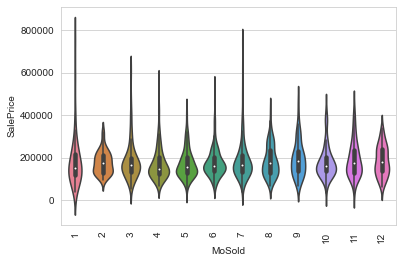

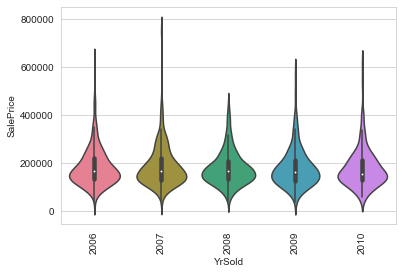

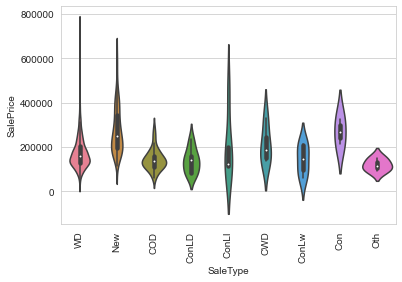

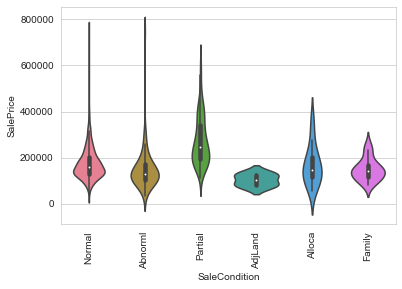

In [8]:
for feature in cat_feat_1:
    sns.violinplot(df[feature],df["SalePrice"],palette='husl')
    plt.xticks(rotation=90)
    plt.show()

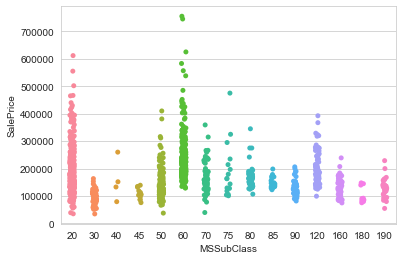

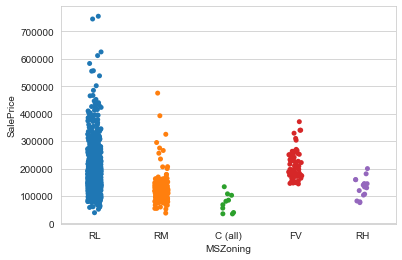

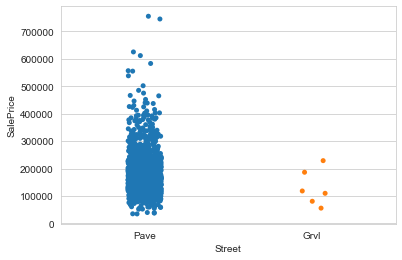

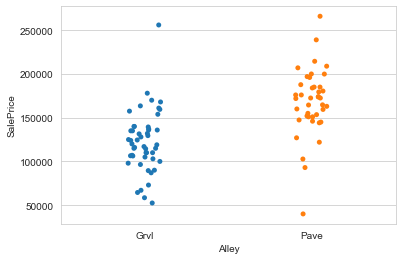

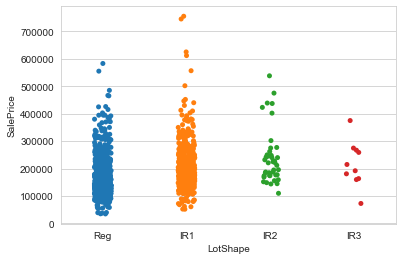

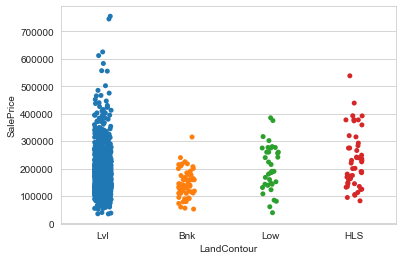

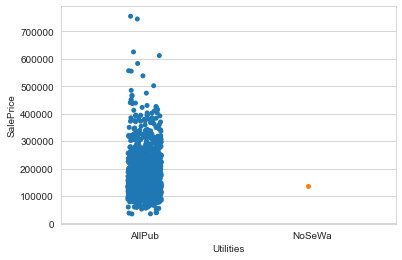

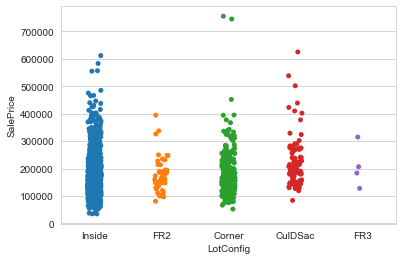

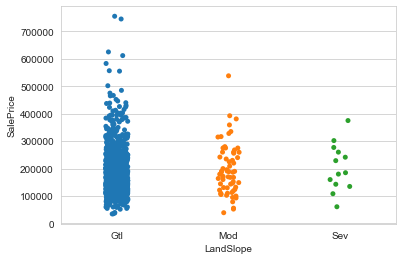

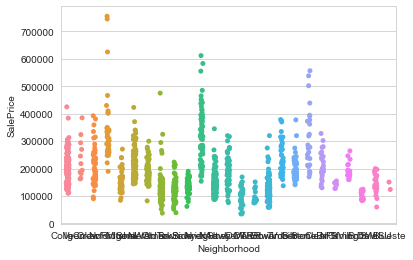

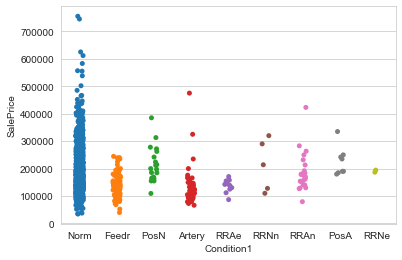

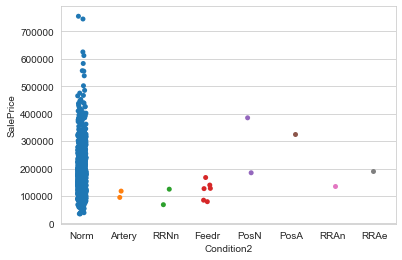

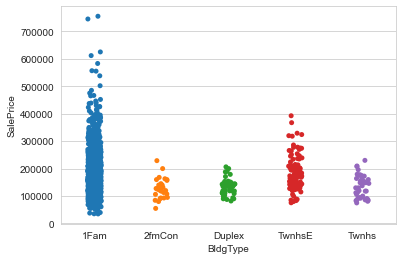

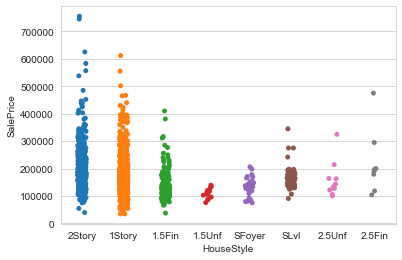

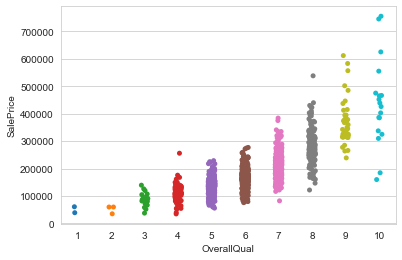

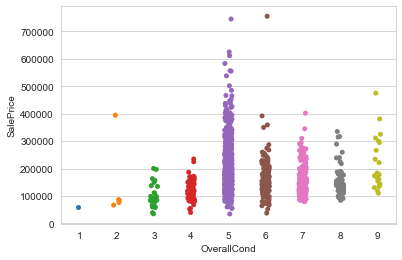

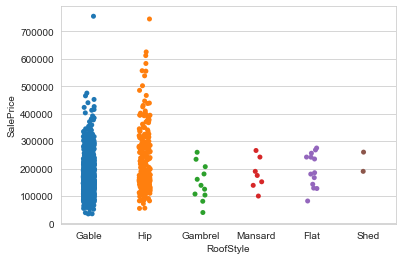

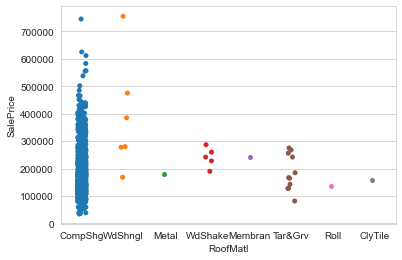

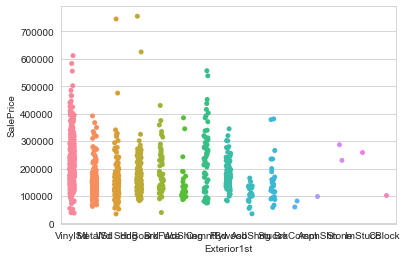

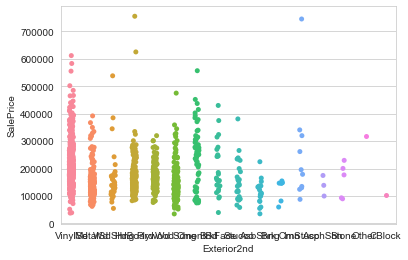

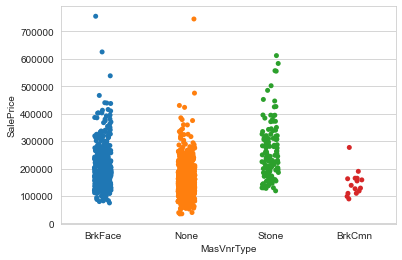

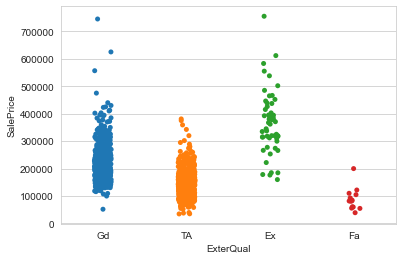

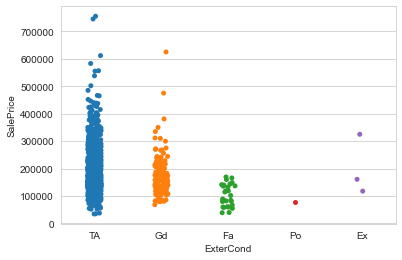

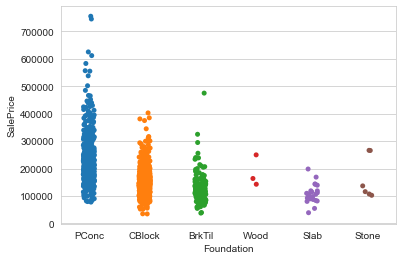

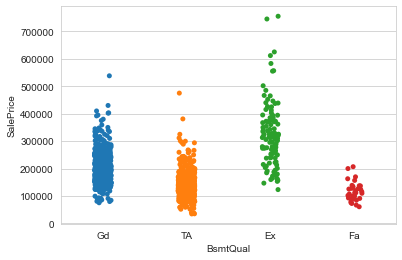

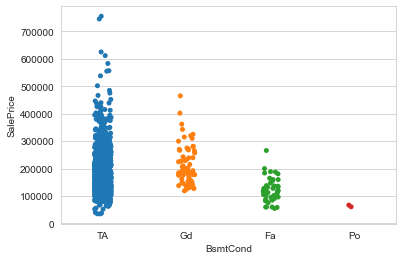

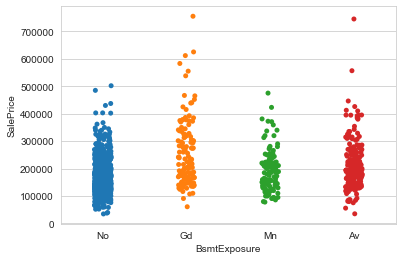

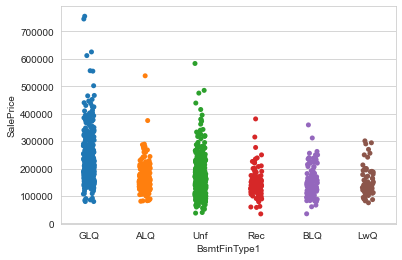

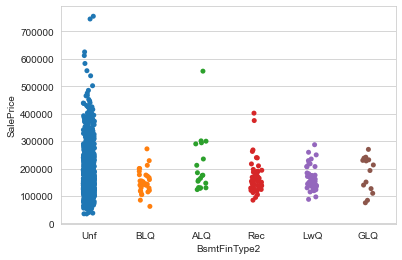

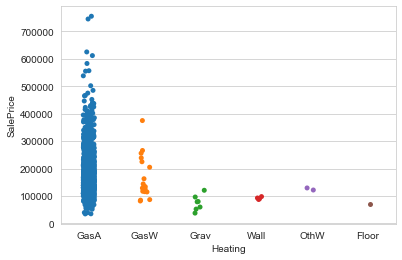

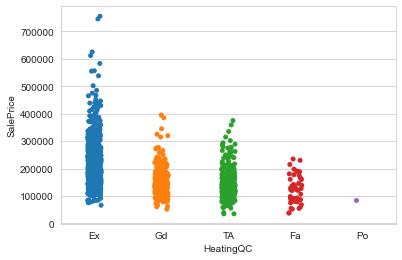

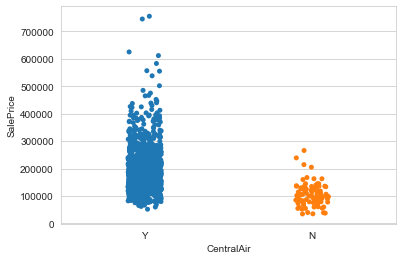

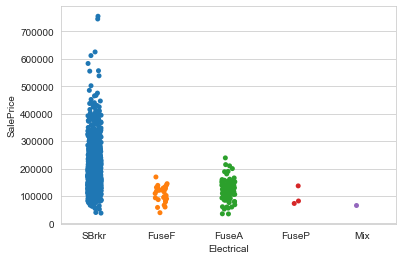

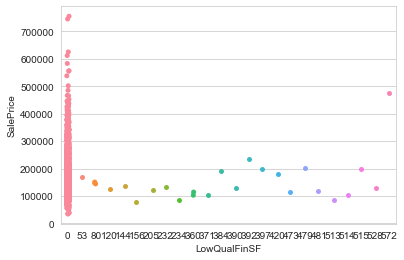

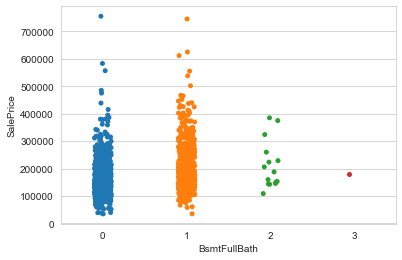

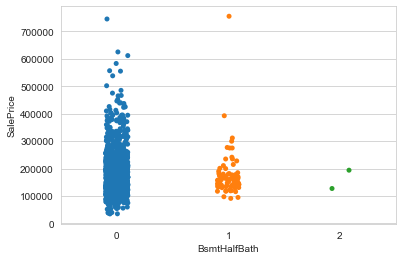

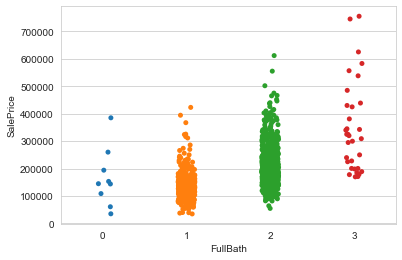

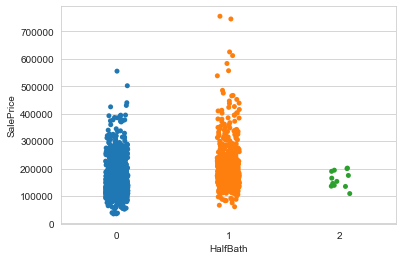

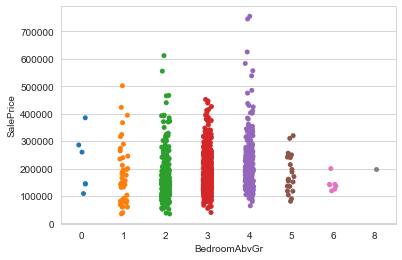

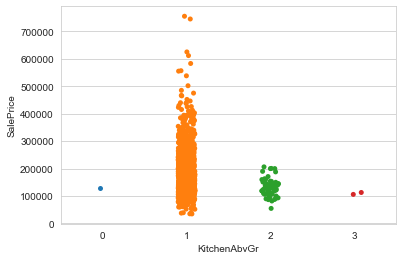

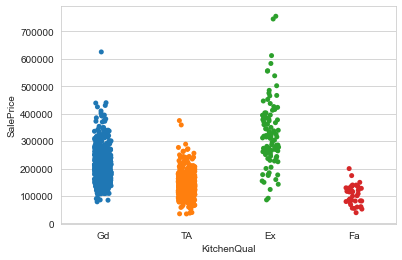

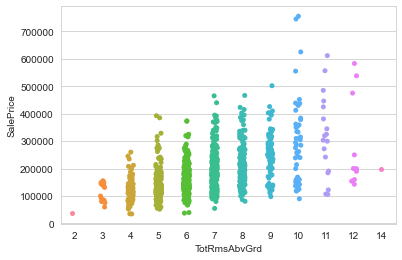

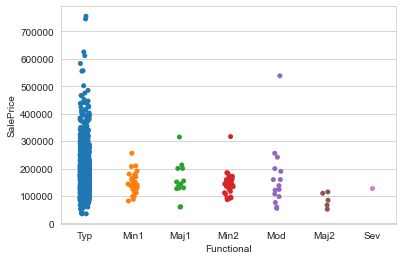

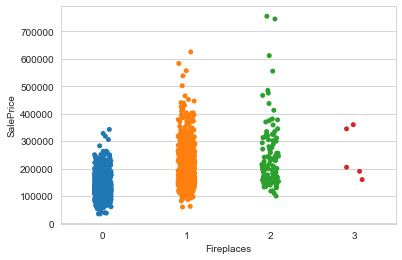

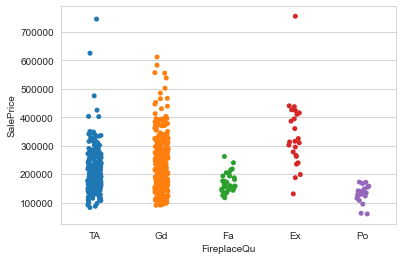

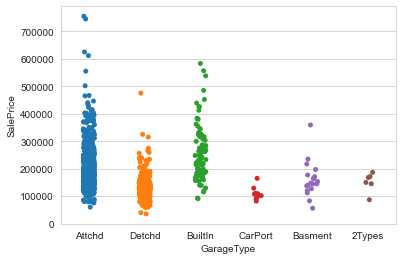

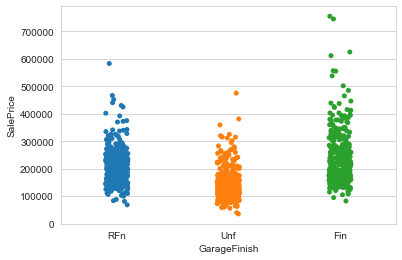

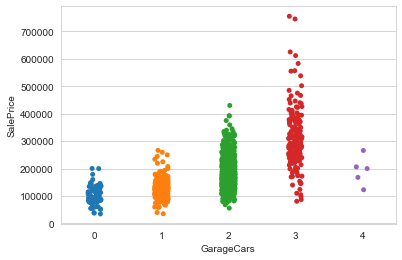

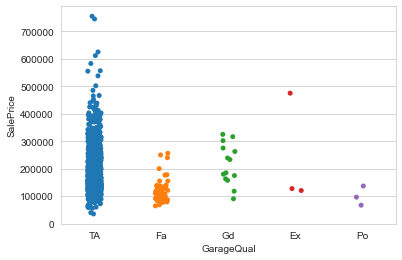

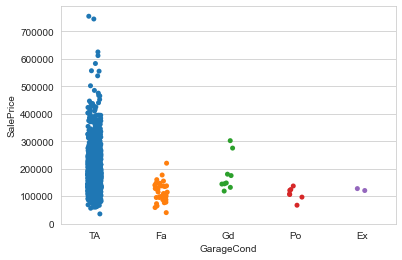

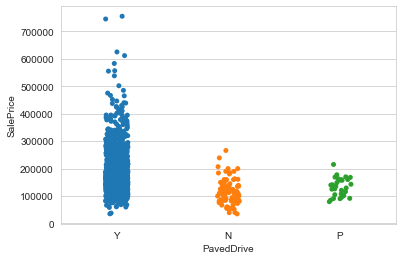

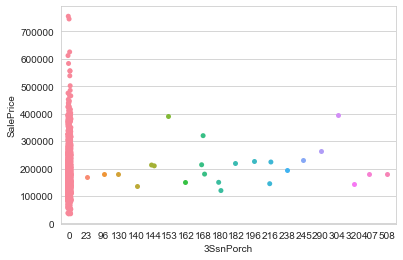

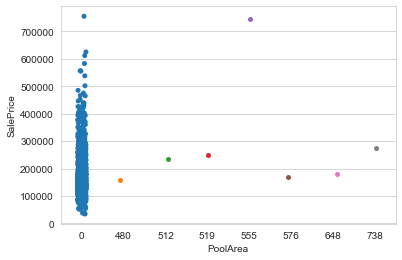

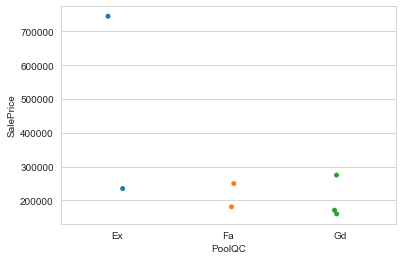

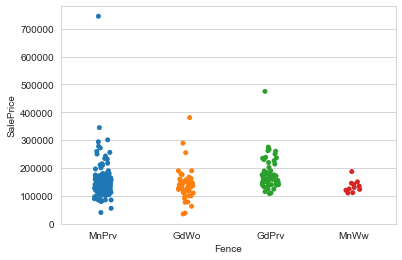

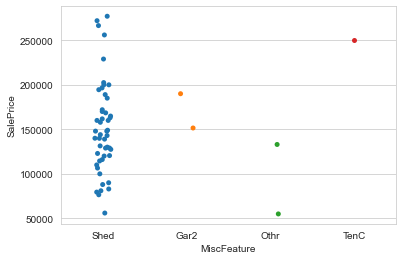

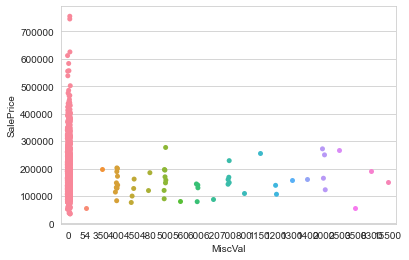

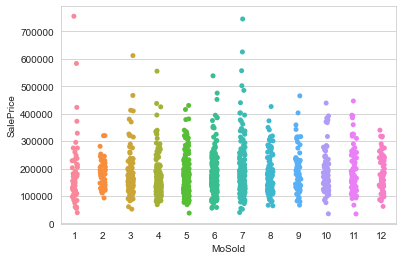

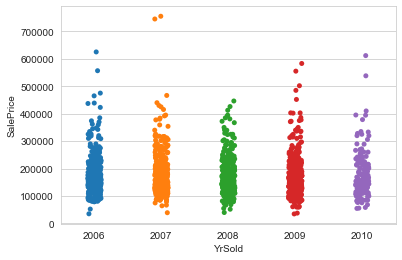

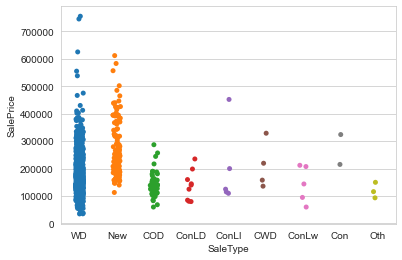

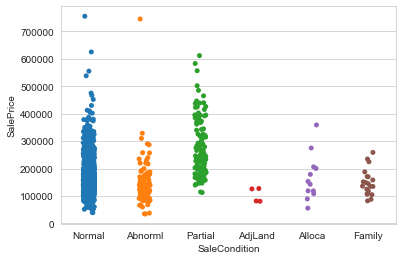

In [9]:
for feature in cat_feat_1:
    sns.stripplot(df[feature],df["SalePrice"])
    plt.show()

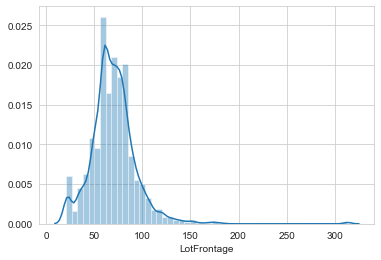

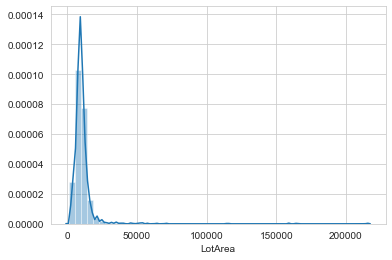

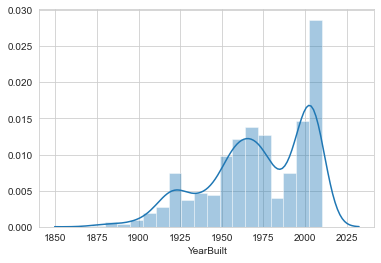

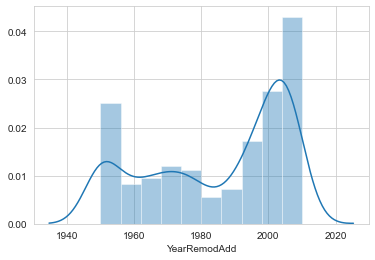

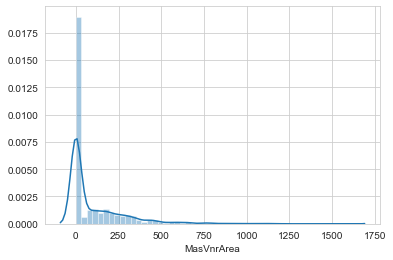

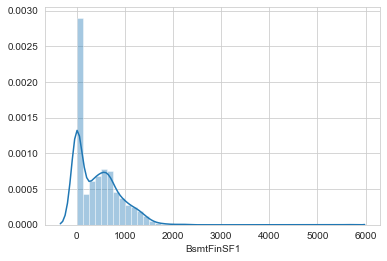

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


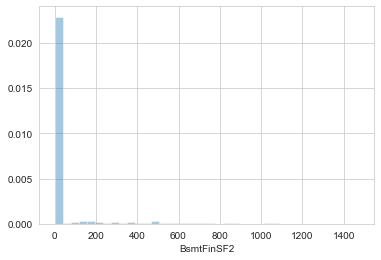

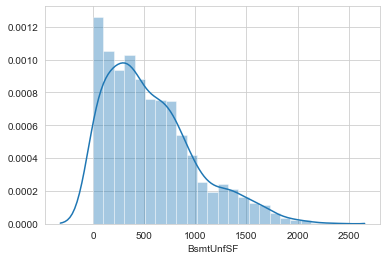

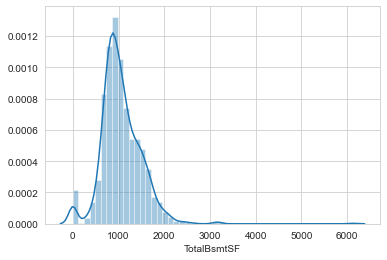

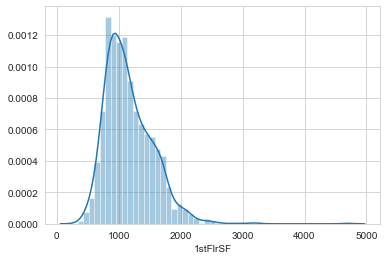

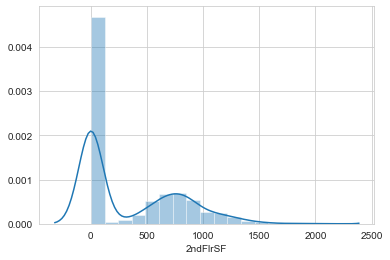

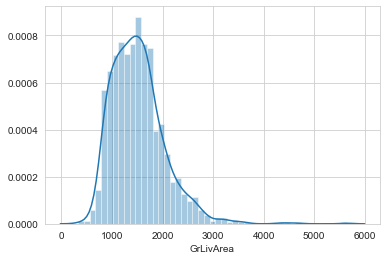

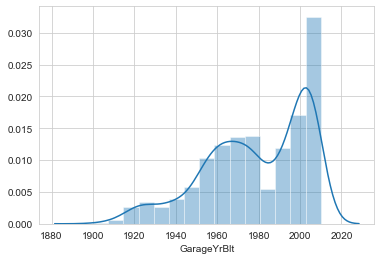

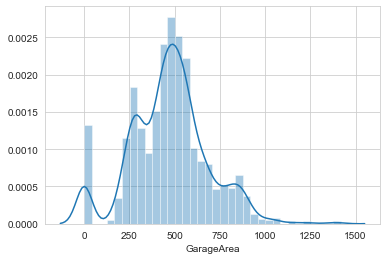

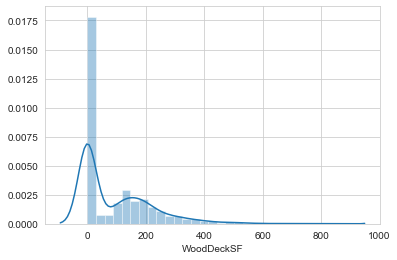

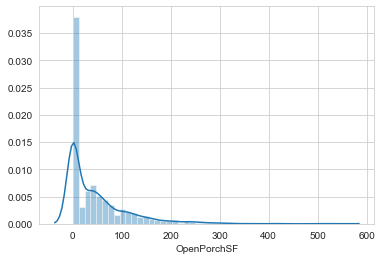

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


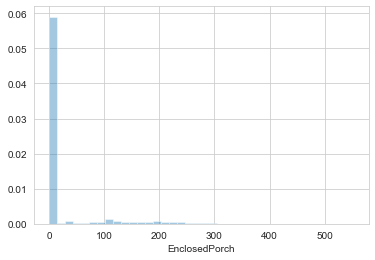

C:\Users\Hari\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


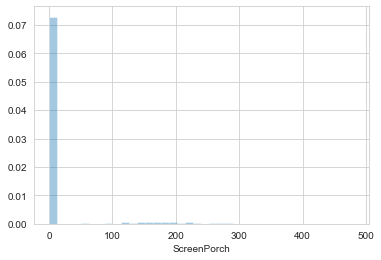

In [10]:
for feature in cont_feat:
    sns.distplot(df[feature])
    plt.show()

# Data Cleaning

In [11]:
i = 0
dropper = []
miss_feat_dict = {}
miss_feat = []
for feature in df.columns:
    if df[feature].isnull().sum()==0:
        pass
    elif df[feature].isnull().sum()/1460<=0.15 :
        print("in {} missing values: {:.2f}%".format(feature,df[feature].isnull().sum()/1460 *100 ))
        miss_feat_dict[feature]=round(df[feature].isnull().sum()/1460 *100,2)
        miss_feat.append(feature)
for feature in df.columns:
    if df[feature].isnull().sum()==0 :
        pass
    elif df[feature].isnull().sum()/1460>0.15 :
        if i==0:
            print("_"*40)
            i = i+1
        print("in {} missing values: {:.2f}%".format(feature,df[feature].isnull().sum()/1460 *100))
        dropper.append(feature)

in MasVnrType missing values: 0.55%
in MasVnrArea missing values: 0.55%
in BsmtQual missing values: 2.53%
in BsmtCond missing values: 2.53%
in BsmtExposure missing values: 2.60%
in BsmtFinType1 missing values: 2.53%
in BsmtFinType2 missing values: 2.60%
in Electrical missing values: 0.07%
in GarageType missing values: 5.55%
in GarageYrBlt missing values: 5.55%
in GarageFinish missing values: 5.55%
in GarageQual missing values: 5.55%
in GarageCond missing values: 5.55%
________________________________________
in LotFrontage missing values: 17.74%
in Alley missing values: 93.77%
in FireplaceQu missing values: 47.26%
in PoolQC missing values: 99.52%
in Fence missing values: 80.75%
in MiscFeature missing values: 96.30%


In [12]:
dropper

['LotFrontage', 'Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [13]:
df.drop(dropper,axis=1,inplace=True)

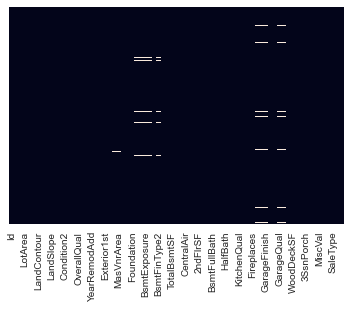

In [14]:
sns.heatmap(df.isnull(),cbar=None,yticklabels=False)

In [15]:
val =[]
for feature in miss_feat:
    val.append( df[feature].isnull().sum())
print("max missing values {} and its percentage {:.3f}%".format(max(val), max(val)*100 /1460))

max missing values 81 and its percentage 5.548%


In [16]:
df_new = df.copy().dropna()
print(df_new.shape)
df_new.head()

(1338, 75)


Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

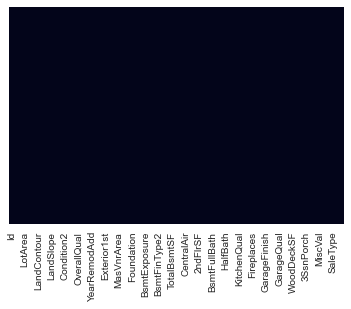

In [17]:
sns.heatmap(df_new.isnull(),cbar=None,yticklabels=False)

In [18]:
df_new.shape

(1338, 75)

In [19]:
cat_feat_1.shape

(61,)

In [20]:
df_new.head()

Id  MSSubClass MSZoning  LotArea Street LotShape LandContour Utilities  \
0   1          60       RL     8450   Pave      Reg         Lvl    AllPub   
1   2          20       RL     9600   Pave      Reg         Lvl    AllPub   
2   3          60       RL    11250   Pave      IR1         Lvl    AllPub   
3   4          70       RL     9550   Pave      IR1         Lvl    AllPub   
4   5          60       RL    14260   Pave      IR1         Lvl    AllPub   

  LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    Inside       Gtl  ...             0         0           0        0   
1       FR2       Gtl  ...             0         0           0        0   
2    Inside       Gtl  ...             0         0           0        0   
3    Corner       Gtl  ...           272         0           0        0   
4       FR2       Gtl  ...             0         0           0        0   

  MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0       0       2    2008        WD         Normal    208500  
1       0       5    2007        WD         Normal    181500  
2       0       9    2008        WD         Normal    223500  
3       0       2    2006        WD        Abnorml    140000  
4       0      12    2008        WD         Normal    250000  

[5 rows x 75 columns]

# Data Extraction

In [21]:
cat_feat_2 = np.array([feature for feature in df_new.columns if df_new[feature].dtype=='O'])

In [22]:
cat_feat_2.shape

(38,)

In [23]:
from sklearn.preprocessing import LabelEncoder
le={}
for feature in cat_feat_2:
    le[feature] = LabelEncoder()
    df_new[feature]  = le[feature].fit_transform(df_new[feature])

In [24]:
cat_feat_3 = np.array([feature for feature in cat_feat_2 if df_new[feature].dtype=='O'])
print(cat_feat_3.shape[0])

0


In [25]:
df_new.head()

Id  MSSubClass  MSZoning  LotArea  Street  LotShape  LandContour  \
0   1          60         3     8450       1         3            3   
1   2          20         3     9600       1         3            3   
2   3          60         3    11250       1         0            3   
3   4          70         3     9550       1         0            3   
4   5          60         3    14260       1         0            3   

   Utilities  LotConfig  LandSlope  ...  EnclosedPorch  3SsnPorch  \
0          0          4          0  ...              0          0   
1          0          2          0  ...              0          0   
2          0          4          0  ...              0          0   
3          0          0          0  ...            272          0   
4          0          2          0  ...              0          0   

   ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  SaleCondition  \
0            0         0        0       2    2008         8              4   
1            0         0        0       5    2007         8              4   
2            0         0        0       9    2008         8              4   
3            0         0        0       2    2006         8              0   
4            0         0        0      12    2008         8              4   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 75 columns]

# Data Modeling with reducing Features
## Feature Selection with correlation

In [26]:
print("Total Number of Features: {} ".format(df_new.shape[1]))

Total Number of Features: 75 


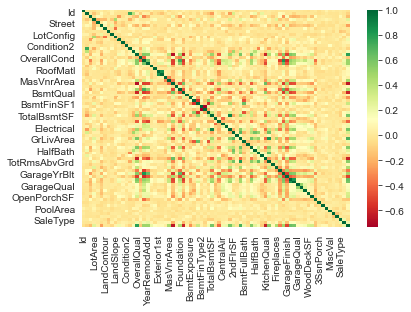

In [27]:
sns.heatmap(df_new.corr(),annot=False,cmap="RdYlGn")

In [29]:
corr = df_new.corr()
corr_feat = []
for feature in corr["SalePrice"].index:
    if (corr["SalePrice"][feature]>0.3 or corr["SalePrice"][feature]<-0.3):
        corr_feat.append(feature)

In [30]:
len(corr_feat)

25

In [31]:
X_2 = df_new[corr_feat].copy().values
y_2 = df_new["SalePrice"].copy()
y_2 = y_2.values

In [32]:
X_2.shape, y_2.shape

((1338, 25), (1338,))

In [33]:
def model1(trdata,tract,tsdata):
    clf.fit(trdata,tract);
    pred= clf.predict(tsdata);
    return pred

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import math
import statistics

In [34]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
cou = 0
RMSE = []
for tr_idx,tst_idx in KFold(5).split(X_2,y_2):
    # Data Spliting
    tr_dt = X_2[tr_idx,:]
    tr_y = y_2[tr_idx]
    tst_dt = X_2[tst_idx,:]
    ts_y = y_2[tst_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    RMSE.append(math.sqrt(mean_squared_error(ts_y, pred)))
    print('Root Mean Square Error test = {:.3f}'.format(math.sqrt(mean_squared_error(ts_y, pred))))
    print("*"*45)

Root Mean Square Error test = 1448.388
*********************************************
Root Mean Square Error test = 3371.749
*********************************************
Root Mean Square Error test = 6496.157
*********************************************
Root Mean Square Error test = 3667.665
*********************************************
Root Mean Square Error test = 5977.268
*********************************************


In [35]:
print("On Training Set \nAverege Root Mean Square Error : {:.2f}".format(statistics.mean(RMSE)))

On Training Set 
Averege Root Mean Square Error : 4192.25


## Feature Selection by Ranking with Entropy

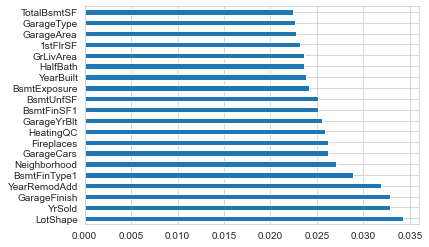

In [36]:
X = df_new.copy().drop(["SalePrice","Id"],axis=1)  #independent columns
y = df_new['SalePrice']    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(criterion='entropy')
model.fit(X,y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [37]:
imp_feat = np.array(feat_importances.nlargest(25).index)

X_final = df_new[imp_feat].copy().values
y_final = df_new["SalePrice"].copy().values


In [38]:
X_final.shape, y_final.shape

((1338, 25), (1338,))

In [39]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
cou = 0
RMSE_entropy = []
for tr_idx,tst_idx in KFold(5).split(X_final,y_final):
    # Data Spliting
    tr_dt = X_final[tr_idx,:]
    tr_y = y_final[tr_idx]
    tst_dt = X_final[tst_idx,:]
    ts_y = y_final[tst_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    RMSE_entropy.append(math.sqrt(mean_squared_error(ts_y, pred)))
    print('Root Mean Square Error test = {:.3f}'.format(math.sqrt(mean_squared_error(ts_y, pred))))
    print("*"*45)

Root Mean Square Error test = 28150.465
*********************************************
Root Mean Square Error test = 36874.511
*********************************************
Root Mean Square Error test = 30980.913
*********************************************
Root Mean Square Error test = 26114.383
*********************************************
Root Mean Square Error test = 34344.467
*********************************************


In [40]:
print("On Training Set \nAverege Root Mean Square Error : {:.2f}".format(statistics.mean(RMSE_entropy)))

On Training Set 
Averege Root Mean Square Error : 31292.95


## PCA

In [92]:
total_feat = df_new.shape[1] - 1 #dependant variable
total_feat

74

In [93]:
from sklearn.decomposition import PCA

In [94]:
X_pca = df_new.copy().drop(['SalePrice','Id'],axis=1).values
y_pca = df_new["SalePrice"].copy().values

In [95]:
X_pca.shape, y_pca.shape

((1338, 73), (1338,))

In [96]:
X_pca = PCA(2).fit_transform(X_pca)
X_pca.shape

(1338, 2)

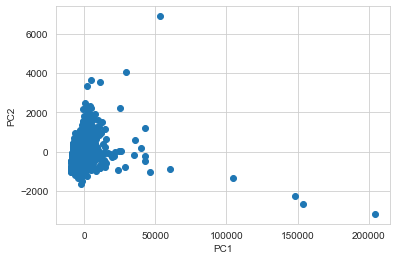

In [97]:
plt.scatter(X_pca[:,0],X_pca[:,1])
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [98]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
cou = 0
RMSE_pca = []
for tr_idx,tst_idx in KFold(5).split(X_pca,y_pca):
    # Data Spliting
    tr_dt = X_final[tr_idx,:]
    tr_y = y_final[tr_idx]
    tst_dt = X_final[tst_idx,:]
    ts_y = y_final[tst_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    RMSE_pca.append(math.sqrt(mean_squared_error(ts_y, pred)))
    print('Root Mean Square Error test = {:.3f}'.format(math.sqrt(mean_squared_error(ts_y, pred))))
    print("*"*45)

Root Mean Square Error test = 28426.791
*********************************************
Root Mean Square Error test = 35780.170
*********************************************
Root Mean Square Error test = 31267.250
*********************************************
Root Mean Square Error test = 26033.229
*********************************************
Root Mean Square Error test = 34186.512
*********************************************


In [99]:
print("On Training Set \nAverege Root Mean Square Error : {:.2f}".format(statistics.mean(RMSE_pca)))

On Training Set 
Averege Root Mean Square Error : 31138.79


In [ ]:
from sklearn.ensemble import RandomForestRegressor
clf = RandomForestRegressor()
cou = 0
RMSE_pca = []
for tr_idx,tst_idx in KFold(5).split(X_pca,y_pca):
    # Data Spliting
    tr_dt = X_final[tr_idx,:]
    tr_y = y_final[tr_idx]
    tst_dt = X_final[tst_idx,:]
    ts_y = y_final[tst_idx]
    pred = model1(tr_dt,tr_y,tst_dt)
    RMSE_pca.append(math.sqrt(mean_squared_error(ts_y, pred)))
    print('Root Mean Square Error test = {:.3f}'.format(math.sqrt(mean_squared_error(ts_y,pred))))
    print("*"*45)

In [128]:
ts_new = []
for i in range(ts_y.shape[0]):
    ts_new.append(math.log(ts_y[i],math.e))

In [129]:
pred_new = []
for i in range(ts_y.shape[0]):
    pred_new.append(math.log(pred[i],math.e))

In [130]:
len(ts_new), len(pred_new)

(267, 267)

In [131]:
ts_new = np.array(ts_new)
pred_new = np.array(pred_new)

In [133]:
print('Root Mean Square Error test = {:.3f}'.format(math.sqrt(mean_squared_error(ts_new,pred_new))))

Root Mean Square Error test = 0.153


In [41]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
#X = df_new.copy().drop(["SalePrice","Id"],axis=1)  #independent columns
#y = df_new['SalePrice']    #target column i.e price range
#apply SelectKBest class to extract top 10 best features
#bestfeatures = SelectKBest(score_func=chi2, k=10)
#fit = bestfeatures.fit(X,y)
#dfscores = pd.DataFrame(fit.scores_)
#dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
#featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#featureScores.columns = ['Specs','Score']  #naming the dataframe columns
#print(featureScores.nlargest(20,'Score'))  #print 10 best features